<a href="https://colab.research.google.com/github/SalmanAlfarizy26/histogram-proyeksi/blob/main/percobaan_Histogram_Cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving satu.png to satu.png


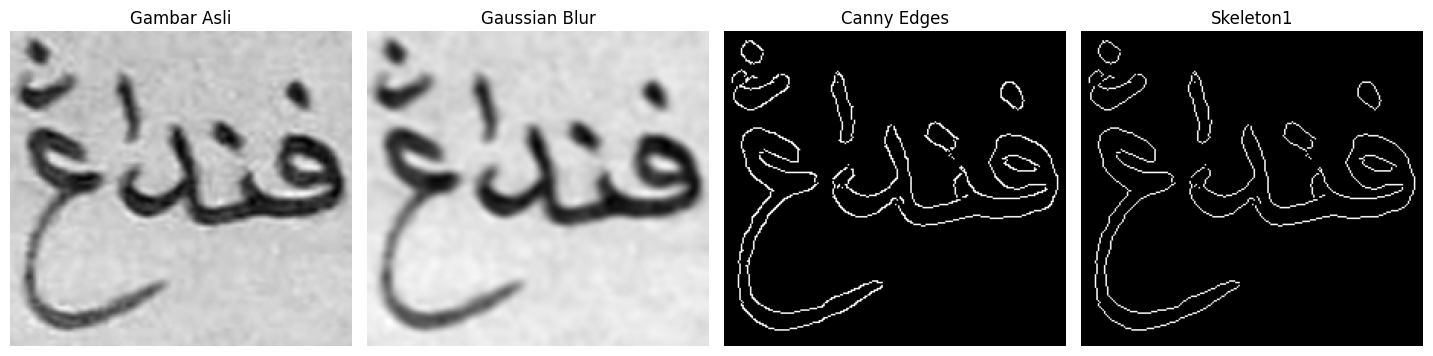

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os # Baris ini ditambahkan
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "satu.png"  # Sesuaikan dengan path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# === 3. Preprocessing ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# === 4. Canny Edge Detection ===
edges = cv2.Canny(blurred, threshold1=50, threshold2=10)

# === 5. Konversi ke Biner ===
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# === 6. Skeletonization ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)


# === 8. Tampilkan Hasil ===
plt.figure(figsize=(18, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton1")
plt.axis("off")

plt.tight_layout()
plt.show()


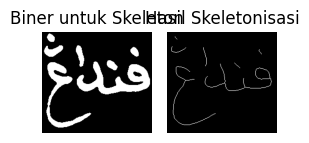

In [ ]:
# === 5. Konversi ke Biner LANGSUNG dari blurred image
_, binary_for_skeleton = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)

# === 6. Skeletonization dari citra biner asli (bukan dari edge)
skeleton = skeletonize(binary_for_skeleton > 0)
skeleton = (skeleton * 255).astype(np.uint8)

plt.subplot(1, 5, 4)
plt.imshow(binary_for_skeleton, cmap="gray")
plt.title("Biner untuk Skeleton")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Hasil Skeletonisasi")
plt.axis("off")

plt.tight_layout()
plt.show()

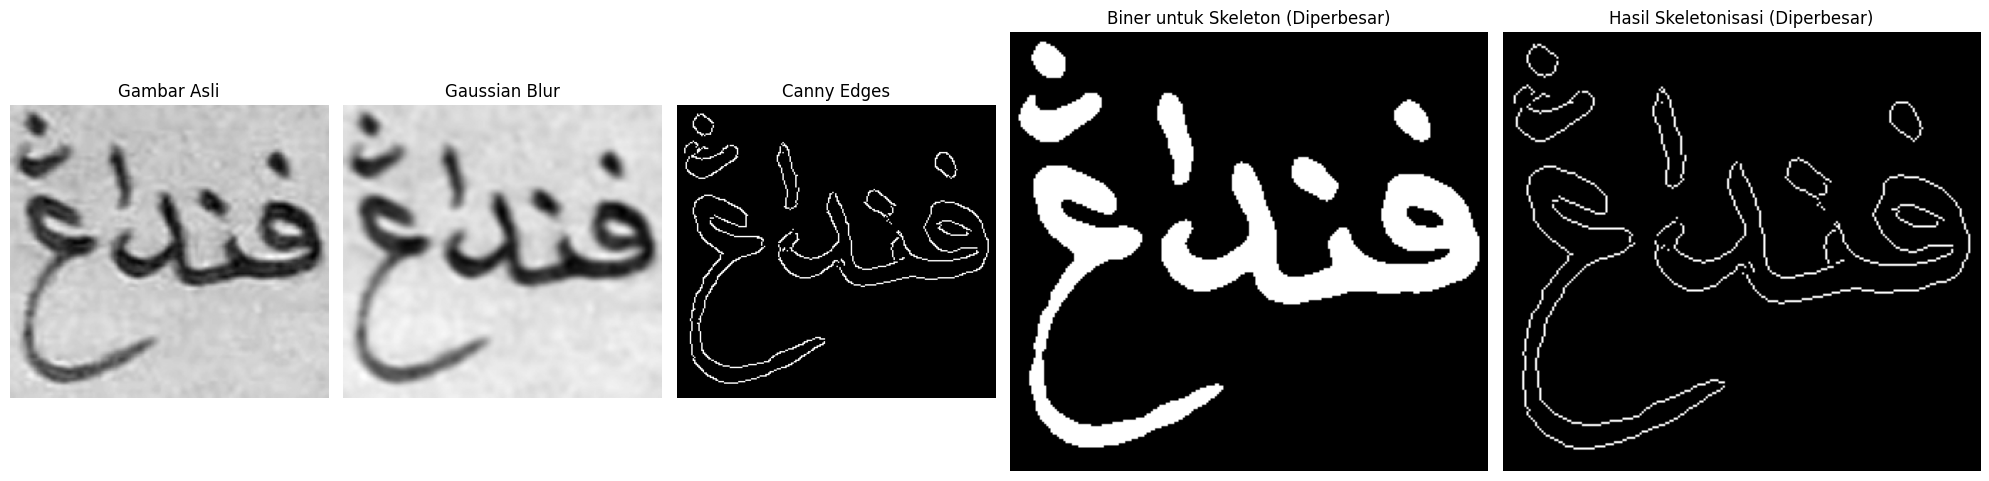

In [ ]:
# ===== PERBAIKAN DISINI =====
# 1. Perbesar ukuran figure (width, height)
plt.figure(figsize=(20, 6))  # Sebelumnya (18,5)

# 2. Atur lebar relatif subplot (beri lebih banyak ruang untuk gambar 4 & 5)
width_ratios = [1, 1, 1, 1.5, 1.5]  # Subplot 4 & 5 lebih lebar
gs = plt.GridSpec(1, 5, width_ratios=width_ratios)

# Subplot 1-3 (gambar asli, blur, canny)
plt.subplot(gs[0])
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(gs[1])
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(gs[2])
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

# Subplot 4 & 5 (biner & skeleton - diperbesar)
plt.subplot(gs[3])  # Lebar 1.5x dari subplot biasa
plt.imshow(binary_for_skeleton, cmap="gray")
plt.title("Biner untuk Skeleton (Diperbesar)")
plt.axis("off")

plt.subplot(gs[4])  # Lebar 1.5x dari subplot biasa
plt.imshow(skeleton, cmap="gray")
plt.title("Hasil Skeletonisasi (Diperbesar)")
plt.axis("off")

plt.tight_layout()
plt.show()

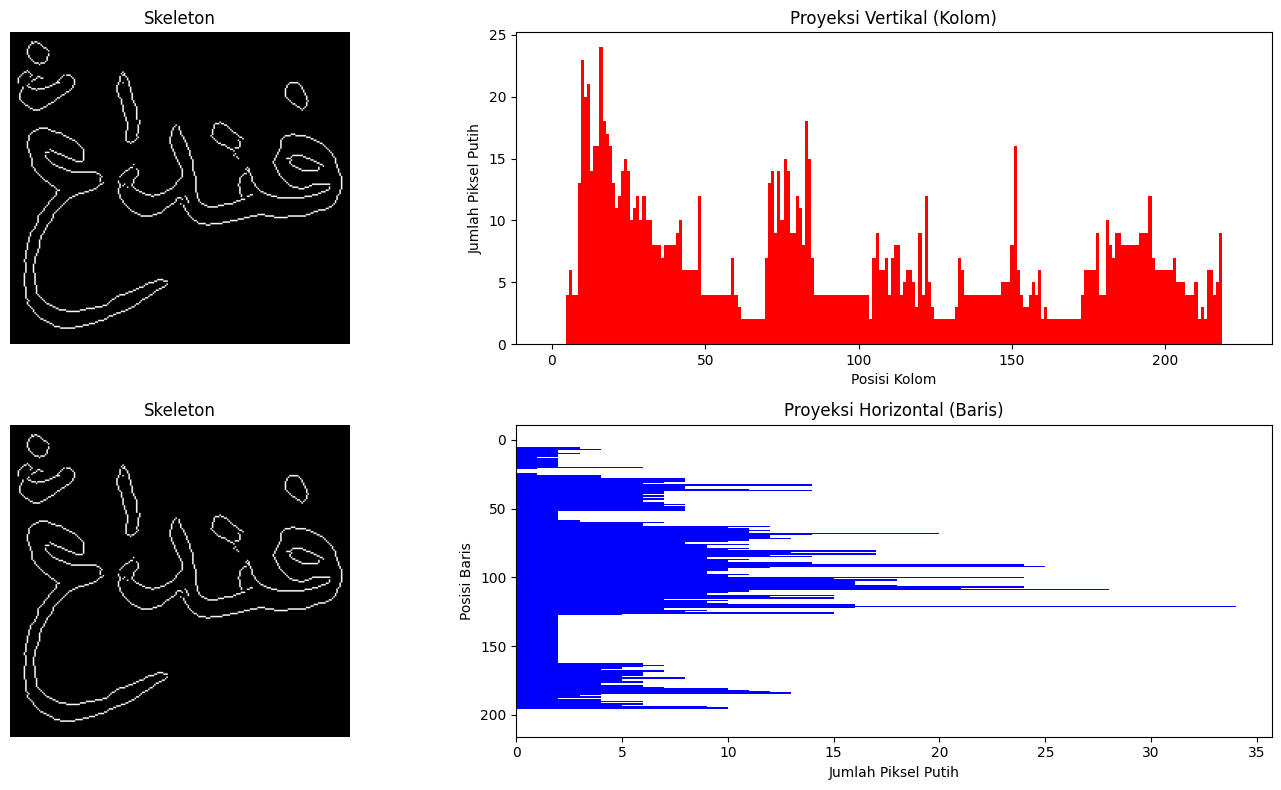

In [ ]:
# ===== HISTOGRAM PROYEKSI =====
# Hitung proyeksi vertikal (jumlah piksel putih per kolom)
vertical_projection = np.sum(skeleton == 255, axis=0)

# Hitung proyeksi horizontal (jumlah piksel putih per baris)
horizontal_projection = np.sum(skeleton== 255, axis=1)

# ===== VISUALISASI HISTOGRAM =====
plt.figure(figsize=(15, 8))

# Subplot 1: Skeleton + Proyeksi Vertikal
plt.subplot(2, 2, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.bar(range(len(vertical_projection)), vertical_projection, width=1.0, color='red')
plt.title("Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Subplot 3: Skeleton + Proyeksi Horizontal
plt.subplot(2, 2, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.barh(range(len(horizontal_projection)), horizontal_projection, height=1.0, color='blue')
plt.title("Proyeksi Horizontal (Baris)")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Posisi Baris")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

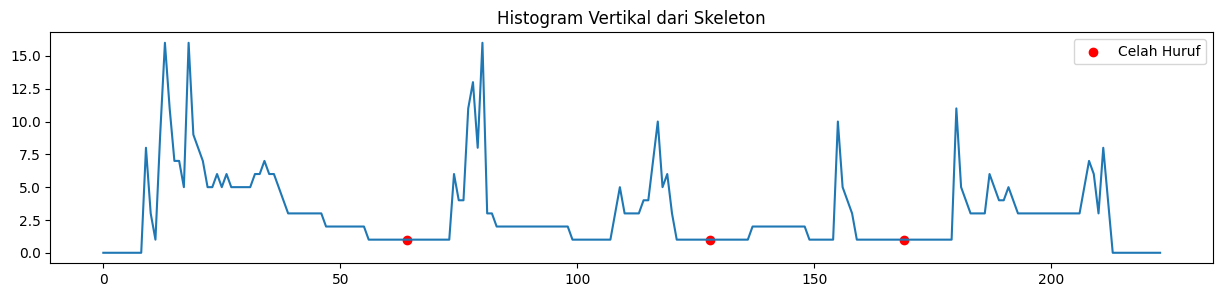

Tidak cukup titik di kolom celah.


In [ ]:
# ===============================
# Setelah plt.show() kode kamu
# ===============================

import numpy as np
import math
from scipy.signal import find_peaks

# Pastikan skeleton dalam format biner
_, binary_skel = cv2.threshold(skeleton, 127, 255, cv2.THRESH_BINARY)

# Ambil koordinat titik skeleton
points = np.column_stack(np.where(binary_skel == 255))

# Buat histogram proyeksi vertikal
hist_col = np.sum(binary_skel == 255, axis=0)

# Cari lembah (indikasi celah antar huruf)
lembah_idx, _ = find_peaks(-hist_col, distance=40, prominence=8)

# Visualisasi histogram
plt.figure(figsize=(15, 3))
plt.plot(hist_col)
plt.scatter(lembah_idx, hist_col[lembah_idx], color='red', label='Celah Huruf')
plt.title("Histogram Vertikal dari Skeleton")
plt.legend()
plt.show()

# Ambil satu celah (misal lembah pertama)
if len(lembah_idx) >= 1:
    col = lembah_idx[0]
    titik_di_kolom = points[points[:, 1] == col]  # Filter titik berdasarkan kolom

    if len(titik_di_kolom) >= 2:
        top = tuple(titik_di_kolom[np.argmin(titik_di_kolom[:, 0])][::-1])
        bottom = tuple(titik_di_kolom[np.argmax(titik_di_kolom[:, 0])][::-1])

        dx = bottom[0] - top[0]
        dy = bottom[1] - top[1]
        angle_rad = math.atan2(dy, dx)
        angle_deg = math.degrees(angle_rad) % 180

        print(f"Sudut kemiringan di celah huruf (kolom {col}): {angle_deg:.2f}°")

        # Visualisasi garis pada skeleton
        skeleton_rgb = cv2.cvtColor(binary_skel, cv2.COLOR_GRAY2BGR)
        cv2.line(skeleton_rgb, top, bottom, (0, 255, 255), 2)  # Garis kuning

        plt.figure(figsize=(8, 6))
        plt.imshow(skeleton_rgb)
        plt.title(f"Garis Kemiringan: {angle_deg:.2f}°")
        plt.axis("off")
        plt.show()
    else:
        print("Tidak cukup titik di kolom celah.")
else:
    print("Tidak ditemukan lembah (celah) antar huruf.")


✅ Sudut kemiringan di celah (kolom 70): 153.43°


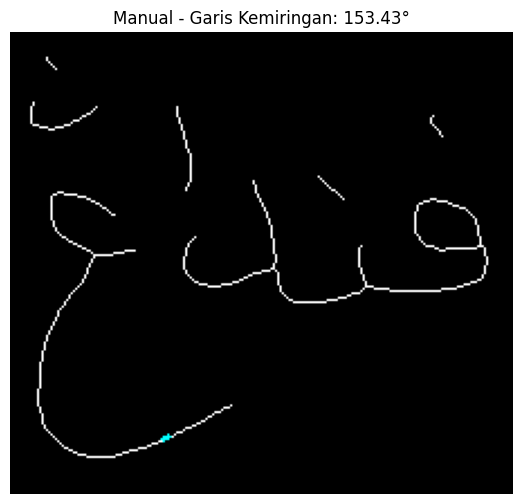

In [ ]:
# =============== LANJUTAN DARI KODEMU ===============
# PILIH KOLOM MANUAL (hasil pengamatan)
col_manual = 70  # Ganti ini sesuai pengamatan celah antara huruf Dal dan Ain

# Ambil titik skeleton di kolom itu ± toleransi
toleransi = 2  # Bisa juga coba 2
mask = (points[:, 1] >= col_manual - toleransi) & (points[:, 1] <= col_manual + toleransi)
titik_di_kolom = points[mask]

if len(titik_di_kolom) >= 2:
    top = tuple(titik_di_kolom[np.argmin(titik_di_kolom[:, 0])][::-1])
    bottom = tuple(titik_di_kolom[np.argmax(titik_di_kolom[:, 0])][::-1])

    dx = bottom[0] - top[0]
    dy = bottom[1] - top[1]
    angle_rad = math.atan2(dy, dx)
    angle_deg = math.degrees(angle_rad) % 180

    print(f"✅ Sudut kemiringan di celah (kolom {col_manual}): {angle_deg:.2f}°")

    # Visualisasi garis kuning
    skeleton_rgb = cv2.cvtColor(binary_skel, cv2.COLOR_GRAY2BGR)
    cv2.line(skeleton_rgb, top, bottom, (0, 255, 255), 2)  # Garis kuning

    plt.figure(figsize=(8, 6))
    plt.imshow(skeleton_rgb)
    plt.title(f"Manual - Garis Kemiringan: {angle_deg:.2f}°")
    plt.axis("off")
    plt.show()
else:
    print("❌ Tidak cukup titik untuk hitung sudut di kolom manual.")


Saving satu.png to satu (1).png


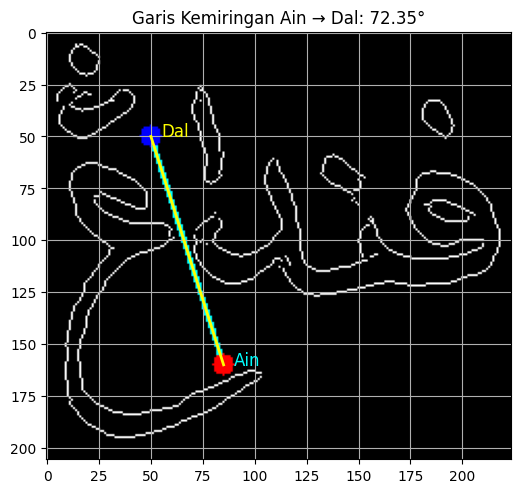

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import files
from skimage.morphology import skeletonize

# Upload gambar
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load dan proses gambar
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)
blurred = cv2.GaussianBlur(image, (9, 9), 0)
edges = cv2.Canny(blurred, 50, 10)
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# Konversi ke RGB untuk anotasi
skeleton_rgb = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)

# Manual pilih 2 titik (ganti sesuai kebutuhanmu)
# Format: (x, y)
ain = (85, 160)
dal = (50, 50)

# Hitung sudut kemiringan
dx = dal[0] - ain[0]
dy = dal[1] - ain[1]
angle_rad = math.atan2(dy, dx)
angle_deg = math.degrees(angle_rad) % 180

# Gambar garis dan anotasi
output = skeleton_rgb.copy()
cv2.line(output, ain, dal, (0, 255, 255), 2)
cv2.circle(output, ain, 5, (255, 0, 0), -1)
cv2.circle(output, dal, 5, (0, 0, 255), -1)


# Tambah label titik
plt.figure(figsize=(6, 6))
plt.imshow(output)
plt.text(ain[0]+5, ain[1], 'Ain', color='cyan', fontsize=12)
plt.text(dal[0]+5, dal[1], 'Dal', color='yellow', fontsize=12)

# Tambah garis bantu & grid
plt.plot([ain[0], dal[0]], [ain[1], dal[1]], color='yellow', linewidth=2)
plt.title(f"Garis Kemiringan Ain → Dal: {angle_deg:.2f}°")
plt.grid(True)
plt.axis('on')
plt.show()


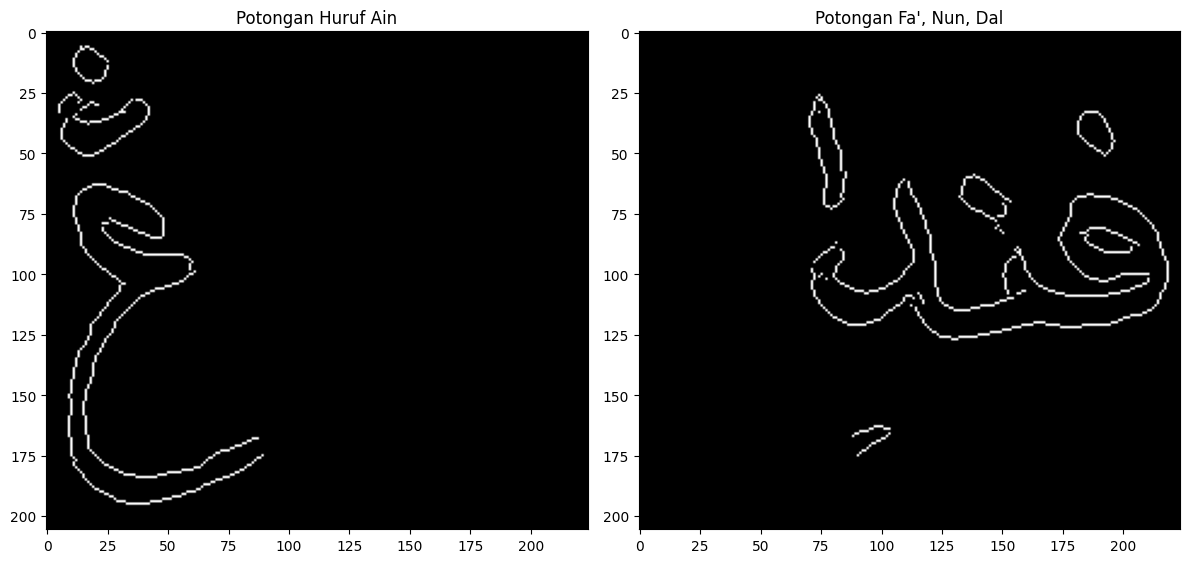

In [ ]:
# === MASKING SISI KIRI DAN KANAN DARI GARIS ===

# Buat vektor arah dari Ain ke Dal
v = np.array([dal[0] - ain[0], dal[1] - ain[1]])
normal = np.array([-v[1], v[0]])  # Rotasi 90 derajat
normal = normal / np.linalg.norm(normal)

# Mask sisi KIRI (misalnya huruf Ain)
mask_ain = np.zeros_like(skeleton, dtype=np.uint8)
# Mask sisi KANAN (misalnya Fa', Nun, Dal)
mask_fnd = np.zeros_like(skeleton, dtype=np.uint8)

for y in range(skeleton.shape[0]):
    for x in range(skeleton.shape[1]):
        p = np.array([x - ain[0], y - ain[1]])
        side = np.dot(p, normal)
        if side < 0:
            mask_ain[y, x] = 255  # sisi kiri garis
        else:
            mask_fnd[y, x] = 255  # sisi kanan garis

# Terapkan masking ke skeleton
ain_result = cv2.bitwise_and(skeleton, skeleton, mask=mask_ain)
fnd_result = cv2.bitwise_and(skeleton, skeleton, mask=mask_fnd)

# === VISUALISASI HASIL POTONGAN ===
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ain_result, cmap='gray')
plt.title("Potongan Huruf Ain")

plt.subplot(1, 2, 2)
plt.imshow(fnd_result, cmap='gray')
plt.title("Potongan Fa', Nun, Dal")

plt.tight_layout()
plt.show()


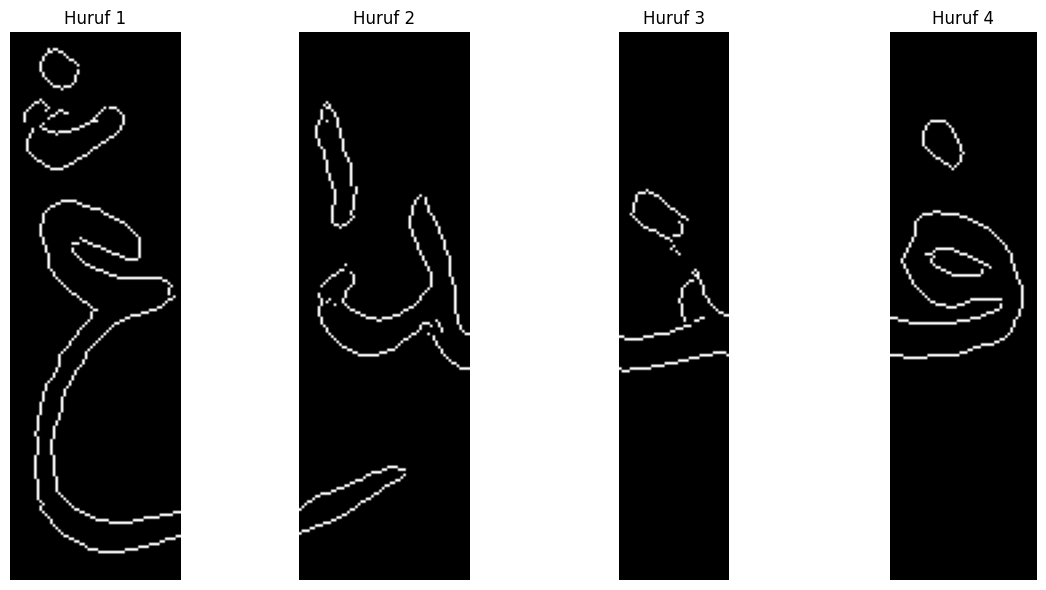

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# == Ambil lembah dari proyeksi vertikal ==
# Cari minimum lokal dengan membalik sinyal proyeksi
valleys, _ = find_peaks(-vertical_projection, prominence=8, distance=40)

# == Gunakan lembah sebagai titik potong ==
batas_potong = valleys

# == Potong gambar berdasarkan titik-titik potong ==
huruf_terpotong = []
start = 0
for batas in batas_potong:
    huruf = skeleton[:, start:batas]
    huruf_terpotong.append(huruf)
    start = batas

# Tambahkan bagian terakhir
huruf_terpotong.append(skeleton[:, start:])

# == Visualisasi hasil pemotongan ==
plt.figure(figsize=(15, 6))
for i, huruf in enumerate(huruf_terpotong[:5]):  # tampilkan hanya 5 huruf pertama
    plt.subplot(1, 5, i+1)
    plt.imshow(huruf, cmap="gray")
    plt.title(f"Huruf {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


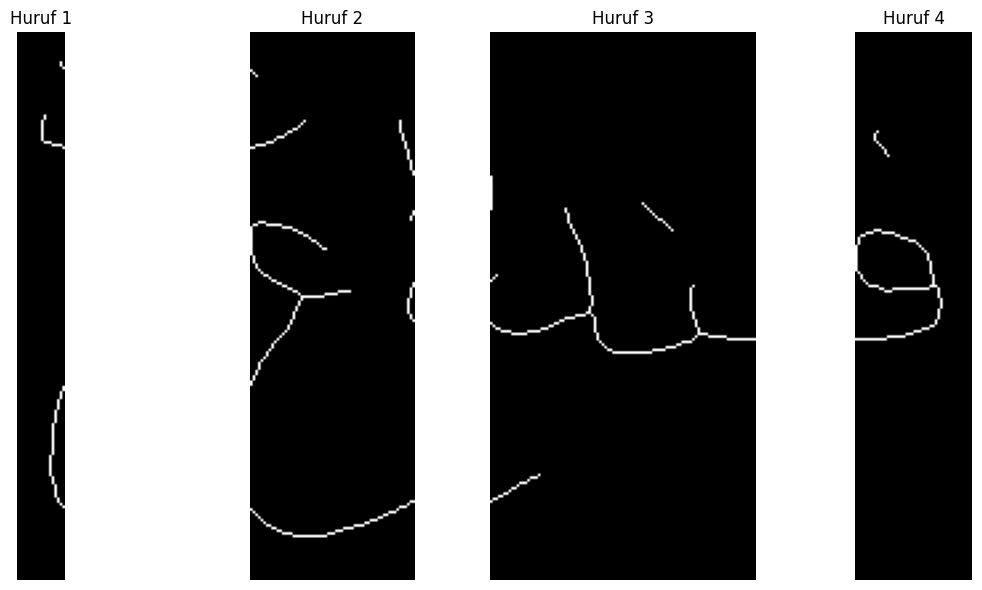

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# == Ambil puncak dari proyeksi vertikal ==
peaks, _ = find_peaks(vertical_projection, prominence=8, distance=40)

# == Gunakan langsung puncak sebagai titik potong ==
batas_potong = peaks

# == Potong gambar berdasarkan titik-titik potong ==
huruf_terpotong = []
start = 0
for batas in batas_potong:
    huruf = skeleton[:, start:batas]
    huruf_terpotong.append(huruf)
    start = batas

# Tambahkan bagian terakhir
huruf_terpotong.append(skeleton[:, start:])

# == Visualisasi hasil pemotongan ==
plt.figure(figsize=(15, 6))
for i, huruf in enumerate(huruf_terpotong[:5]):  # tampilkan hanya 5 huruf pertama
    plt.subplot(1, 5, i+1)
    plt.imshow(huruf, cmap="gray")
    plt.title(f"Huruf {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


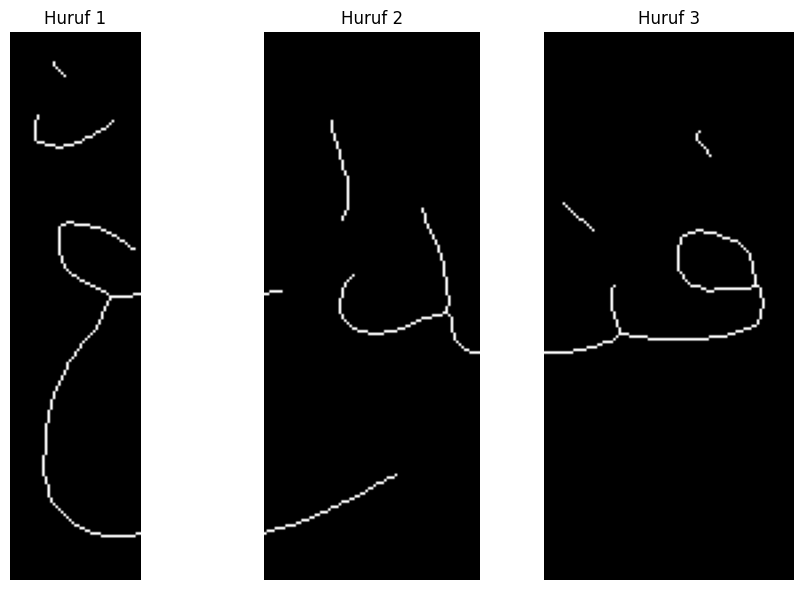

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# == Ambil puncak dari proyeksi vertikal ==
peaks, _ = find_peaks(vertical_projection, prominence=8, distance=40)

# == Tentukan titik potong sebagai titik tengah antar puncak ==
batas_potong = []
for i in range(len(peaks)-1):
    midpoint = (peaks[i] + peaks[i+1]) // 2
    batas_potong.append(midpoint)

# == Potong gambar berdasarkan titik-titik potong ==
huruf_terpotong = []
start = 0
for batas in batas_potong:
    huruf = skeleton[:, start:batas]
    huruf_terpotong.append(huruf)
    start = batas

# Tambahkan bagian terakhir
huruf_terpotong.append(skeleton[:, start:])

# == Visualisasi hasil pemotongan ==
plt.figure(figsize=(15, 6))
for i, huruf in enumerate(huruf_terpotong[:5]):  # tampilkan hanya 5 huruf pertama
    plt.subplot(1, 5, i+1)
    plt.imshow(huruf, cmap="gray")
    plt.title(f"Huruf {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Saving contoh.jpeg to contoh.jpeg


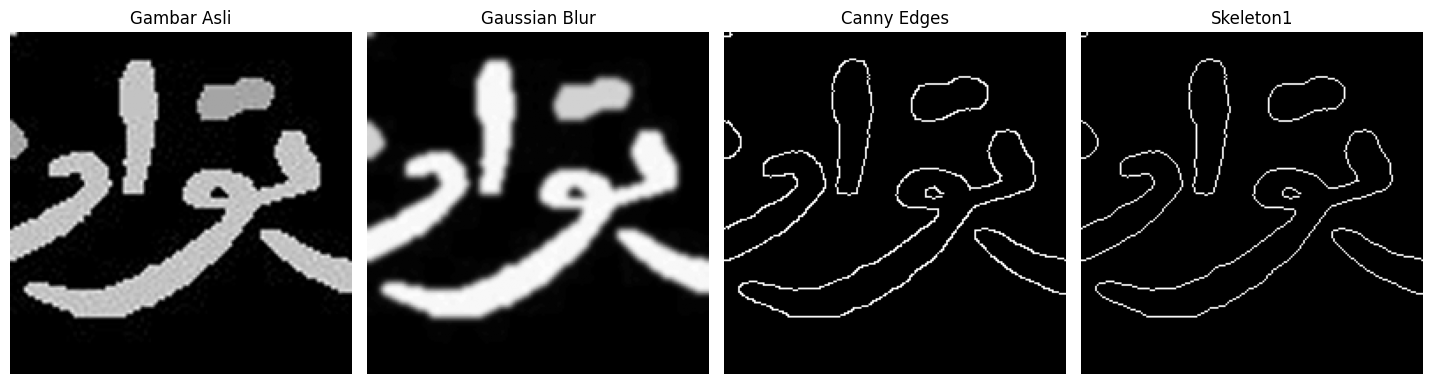

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os # Baris ini ditambahkan
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "contoh.jpeg"  # Sesuaikan dengan path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# === 3. Preprocessing ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# === 4. Canny Edge Detection ===
edges = cv2.Canny(blurred, threshold1=50, threshold2=10)

# === 5. Konversi ke Biner ===
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# === 6. Skeletonization ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)


# === 8. Tampilkan Hasil ===
plt.figure(figsize=(18, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton1")
plt.axis("off")

plt.tight_layout()
plt.show()


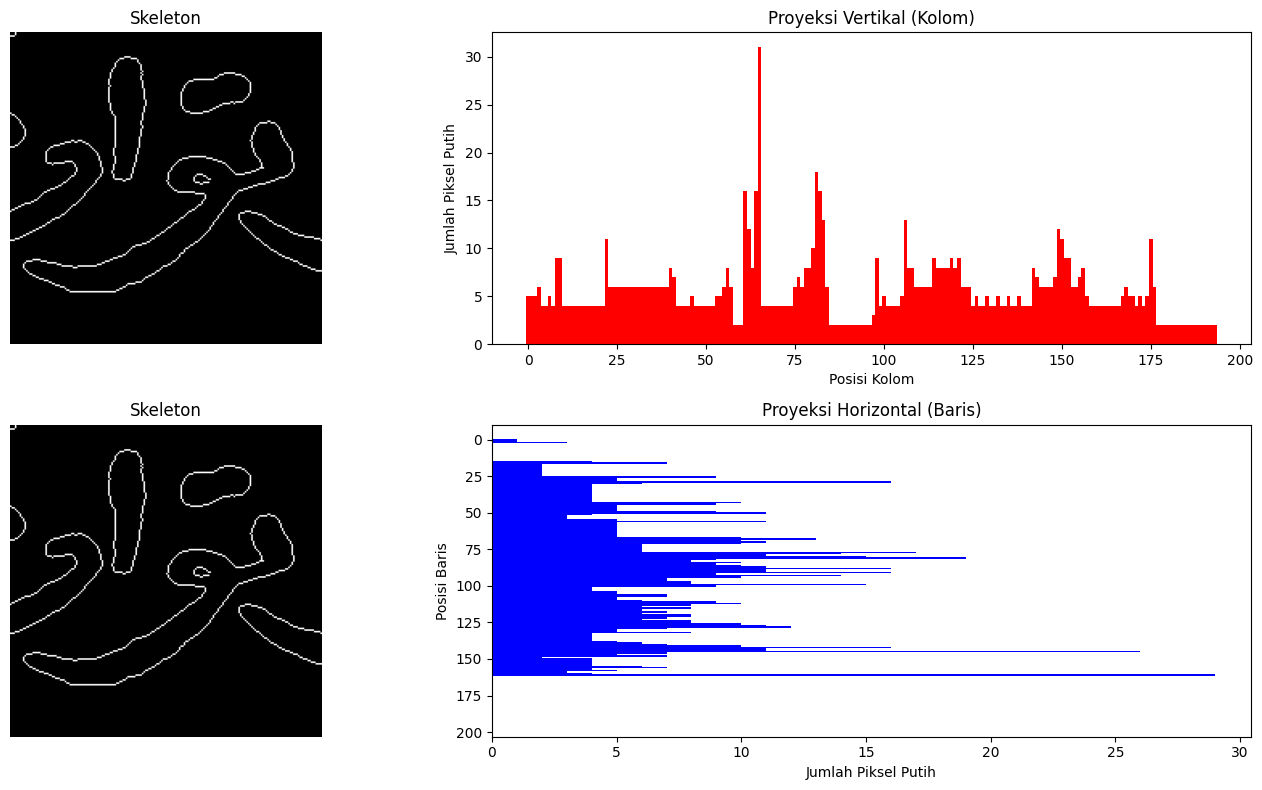

In [ ]:
# ===== HISTOGRAM PROYEKSI =====
# Hitung proyeksi vertikal (jumlah piksel putih per kolom)
vertical_projection = np.sum(skeleton == 255, axis=0)

# Hitung proyeksi horizontal (jumlah piksel putih per baris)
horizontal_projection = np.sum(skeleton== 255, axis=1)

# ===== VISUALISASI HISTOGRAM =====
plt.figure(figsize=(15, 8))

# Subplot 1: Skeleton + Proyeksi Vertikal
plt.subplot(2, 2, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.bar(range(len(vertical_projection)), vertical_projection, width=1.0, color='red')
plt.title("Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Subplot 3: Skeleton + Proyeksi Horizontal
plt.subplot(2, 2, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.barh(range(len(horizontal_projection)), horizontal_projection, height=1.0, color='blue')
plt.title("Proyeksi Horizontal (Baris)")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Posisi Baris")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

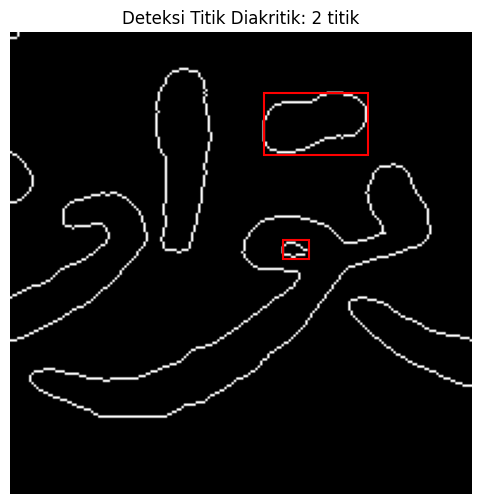

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.measure import label, regionprops

# === 1. Load dan Preprocess Gambar ===
image_path = "contoh.jpeg"  # Ganti dengan nama file kamu
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Gambar tidak ditemukan!")

# Resize agar lebih besar (opsional)
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# Gaussian Blur dan Canny
blurred = cv2.GaussianBlur(image, (9, 9), 0)
edges = cv2.Canny(blurred, 50, 10)
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# Skeletonize
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 2. Deteksi Baseline dari Histogram Proyeksi Horizontal ===
horizontal_hist = np.sum(binary == 255, axis=1)
baseline_row = np.argmax(horizontal_hist)

# === 3. Label Komponen dan Ambil yang Di Atas Baseline ===
labeled = label(binary > 0)
mask_above_baseline = np.zeros_like(labeled)

for region in regionprops(labeled):
    minr, minc, maxr, maxc = region.bbox
    if maxr < baseline_row:  # Posisi benar-benar di atas baseline
        mask_above_baseline[minr:maxr, minc:maxc] = labeled[minr:maxr, minc:maxc]

# === 4. Filter Titik Berdasarkan Ukuran dan Bentuk ===
filtered_dots = []
for region in regionprops(label(mask_above_baseline)):
    area = region.area
    minr, minc, maxr, maxc = region.bbox
    aspect_ratio = (maxc - minc + 1e-5) / (maxr - minr + 1e-5)

    # Ciri khas titik: area kecil & agak bulat
    if 10 < area < 150 and 0.5 < aspect_ratio < 2.0:
        filtered_dots.append(region.bbox)

# === 5. Visualisasi ===
plt.figure(figsize=(6, 6))
plt.imshow(skeleton, cmap='gray')
for bbox in filtered_dots:
    minr, minc, maxr, maxc = bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

plt.title(f"Deteksi Titik Diakritik: {len(filtered_dots)} titik")
plt.axis("off")
plt.show()


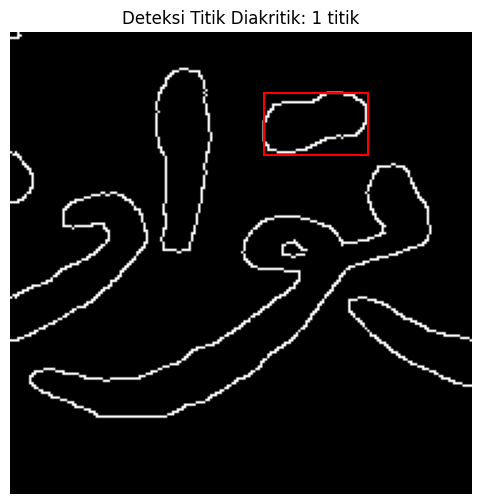

In [ ]:
# === 4. Filter Titik Berdasarkan Ukuran, Bentuk, dan Kepadatan (extent) ===
filtered_dots = []
for region in regionprops(label(mask_above_baseline)):
    area = region.area
    minr, minc, maxr, maxc = region.bbox
    width = maxc - minc
    height = maxr - minr
    aspect_ratio = width / (height + 1e-5)
    bbox_area = width * height
    extent = area / (bbox_area + 1e-5)  # seberapa padat isi bounding box

    # Filter lebih ketat: bulat, padat, kecil
    # Pastikan kondisi if berada di indentasi yang benar
    if 30 < area < 150 and 0.5 < aspect_ratio < 2.6:
        filtered_dots.append(region.bbox) # Indentasi ini sekarang benar di dalam if


# === 5. Visualisasi pada citra binary (bukan skeleton) ===
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')  # Ganti dari skeleton ke binary
for bbox in filtered_dots:
    minr, minc, maxr, maxc = bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

plt.title(f"Deteksi Titik Diakritik: {len(filtered_dots)} titik")
plt.axis("off")
plt.show()

In [ ]:
from skimage.measure import label, regionprops

# === 6. Buat rasm_mask dari binary: ambil komponen besar sebagai huruf utama ===
labels, stats = cv2.connectedComponentsWithStats(binary, connectivity=8)[1:3]

rasm_mask = np.zeros_like(binary)
for i in range(1, len(stats)):  # Lewati background
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= 150:  # Ambang area huruf utama (boleh disesuaikan)
        rasm_mask[labels == i] = 255

# === 7. Deteksi region rasm (huruf utama)
rasm_labels = label(rasm_mask)
rasm_regions = regionprops(rasm_labels)

# === 8. Hubungkan titik → huruf rasm terdekat
asosiasi = []  # Simpan pasangan: (index_titik, index_huruf)

for idx_titik, bbox_titik in enumerate(filtered_dots):
    minr_t, minc_t, maxr_t, maxc_t = bbox_titik
    center_x_titik = (minc_t + maxc_t) / 2
    center_y_titik = (minr_t + maxr_t) / 2

    kandidat_terdekat = None
    jarak_min = float('inf')

    for idx_huruf, region in enumerate(rasm_regions):
        minr_h, minc_h, maxr_h, maxc_h = region.bbox
        center_x_huruf = (minc_h + maxc_h) / 2
        center_y_huruf = (minr_h + maxr_h) / 2

                # Titik harus berada di atas huruf, dan secara horizontal sejajar
        if minc_h <= center_x_titik <= maxc_h and center_y_titik < minr_h:
            delta_y = minr_h - center_y_titik  # semakin kecil semakin baik
            if delta_y < jarak_min:
                jarak_min = delta_y
                kandidat_terdekat = idx_huruf


    asosiasi.append((idx_titik, kandidat_terdekat))

# === 9. Cetak hasil asosiasi titik → huruf
print("=== HASIL ASOSIASI TITIK DIAKRITIK ===")
for titik_id, huruf_id in asosiasi:
    if huruf_id is not None:
        print(f"Titik {titik_id + 1} diasosiasikan ke huruf Rasm {huruf_id + 1}")
    else:
        print(f"Titik {titik_id + 1} tidak punya huruf pemilik (kemungkinan noise)")


=== HASIL ASOSIASI TITIK DIAKRITIK ===
Titik 1 diasosiasikan ke huruf Rasm 2


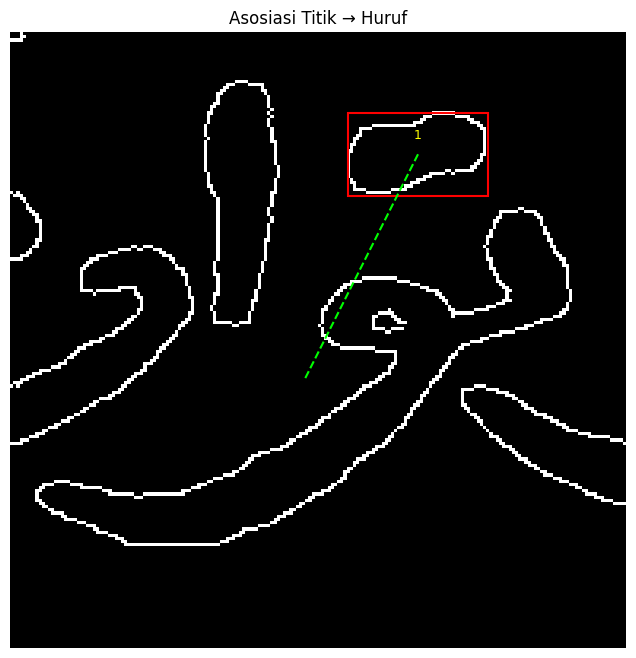

In [ ]:
# === 10. Visualisasi Garis Asosiasi Titik → Huruf ===
plt.figure(figsize=(8, 8))
plt.imshow(binary, cmap='gray')
plt.title("Asosiasi Titik → Huruf")
plt.axis("off")

# Gambar semua bounding box titik
for idx_titik, bbox_titik in enumerate(filtered_dots):
    minr_t, minc_t, maxr_t, maxc_t = bbox_titik
    center_x_titik = (minc_t + maxc_t) / 2
    center_y_titik = (minr_t + maxr_t) / 2

    # Ambil ID huruf hasil asosiasi
    huruf_id = asosiasi[idx_titik][1]

    # Gambar kotak titik
    rect = plt.Rectangle((minc_t, minr_t), maxc_t - minc_t, maxr_t - minr_t,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

    # Jika huruf ditemukan, gambar garis dari titik → huruf
    if huruf_id is not None:
        region_huruf = rasm_regions[huruf_id]
        minr_h, minc_h, maxr_h, maxc_h = region_huruf.bbox
        center_x_huruf = (minc_h + maxc_h) / 2
        center_y_huruf = (minr_h + maxr_h) / 2

        plt.plot([center_x_titik, center_x_huruf],
                 [center_y_titik, center_y_huruf],
                 color='lime', linestyle='--', linewidth=1.5)

        # Tambahkan label nomor titik
        plt.text(center_x_titik, center_y_titik - 5, f"{idx_titik+1}",
                 color='yellow', fontsize=9, ha='center')


=== HASIL ASOSIASI TITIK DIAKRITIK (PASTI TEPAT DI BAWAH) ===
Titik 1 → Tidak ditemukan huruf pemilik


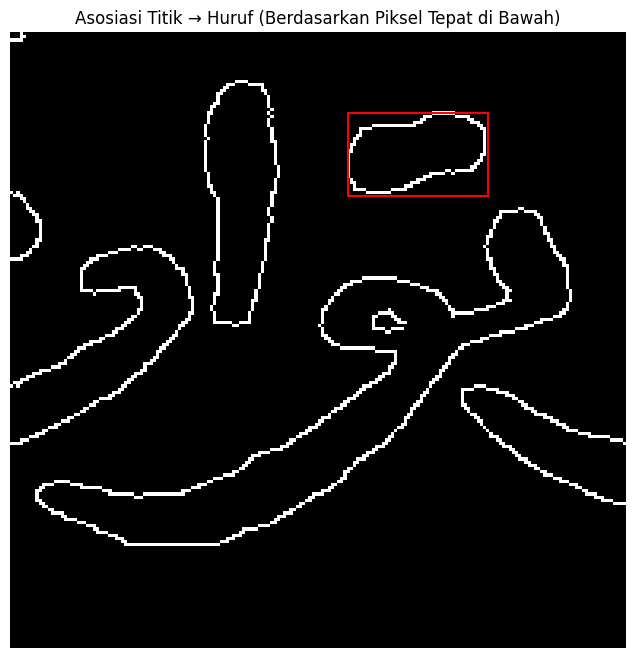

In [ ]:
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt
import cv2

# === [1] RASM MASK: Buat mask huruf utama dari citra biner ===
labels, stats = cv2.connectedComponentsWithStats(binary, connectivity=8)[1:3]
rasm_mask = np.zeros_like(binary)

for i in range(1, len(stats)):  # Lewati background
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= 150:  # Batas area huruf utama
        rasm_mask[labels == i] = 255

# === [2] Label komponen huruf utama ===
rasm_labels = label(rasm_mask)
rasm_regions = regionprops(rasm_labels)

# === [3] Asosiasi titik ke huruf: cari huruf yang tepat di bawah titik ===
asosiasi = []

for idx_titik, bbox_titik in enumerate(filtered_dots):
    minr_t, minc_t, maxr_t, maxc_t = bbox_titik
    center_x_titik = (minc_t + maxc_t) // 2
    bawah_y = maxr_t + 1  # titik bawah + 1 piksel

    kandidat_id = None
    if 0 <= bawah_y < rasm_labels.shape[0] and 0 <= center_x_titik < rasm_labels.shape[1]:
        huruf_label = rasm_labels[bawah_y, center_x_titik]
        if huruf_label != 0:
            kandidat_id = huruf_label - 1  # karena label dimulai dari 1

    asosiasi.append((idx_titik, kandidat_id))

# === [4] Tampilkan hasil asosiasi ===
print("=== HASIL ASOSIASI TITIK DIAKRITIK (PASTI TEPAT DI BAWAH) ===")
for titik_id, huruf_id in asosiasi:
    if huruf_id is not None:
        print(f"Titik {titik_id + 1} → Huruf Rasm {huruf_id + 1}")
    else:
        print(f"Titik {titik_id + 1} → Tidak ditemukan huruf pemilik")

# === [5] Visualisasi hasil asosiasi dengan garis penghubung ===
plt.figure(figsize=(8, 8))
plt.imshow(binary, cmap='gray')
plt.title("Asosiasi Titik → Huruf (Berdasarkan Piksel Tepat di Bawah)")
plt.axis("off")

for idx_titik, bbox_titik in enumerate(filtered_dots):
    minr_t, minc_t, maxr_t, maxc_t = bbox_titik
    center_x_titik = (minc_t + maxc_t) / 2
    center_y_titik = (minr_t + maxr_t) / 2

    huruf_id = asosiasi[idx_titik][1]

    # Gambar kotak merah di titik
    rect = plt.Rectangle((minc_t, minr_t), maxc_t - minc_t, maxr_t - minr_t,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

    # Garis penghubung jika ada huruf valid
    if huruf_id is not None:
        region_huruf = rasm_regions[huruf_id]
        minr_h, minc_h, maxr_h, maxc_h = region_huruf.bbox
        center_x_huruf = (minc_h + maxc_h) / 2
        center_y_huruf = (minr_h + maxr_h) / 2

        plt.plot([center_x_titik, center_x_huruf],
                 [center_y_titik, center_y_huruf],
                 color='lime', linestyle='--', linewidth=1.5)

        # Tambahkan label titik
        plt.text(center_x_titik, center_y_titik - 5, f"{idx_titik + 1}",
                 color='yellow', fontsize=9, ha='center')


=== HASIL ASOSIASI TITIK DIAKRITIK (X sejajar + Y terdekat) ===
Titik 1 → Huruf Rasm 3


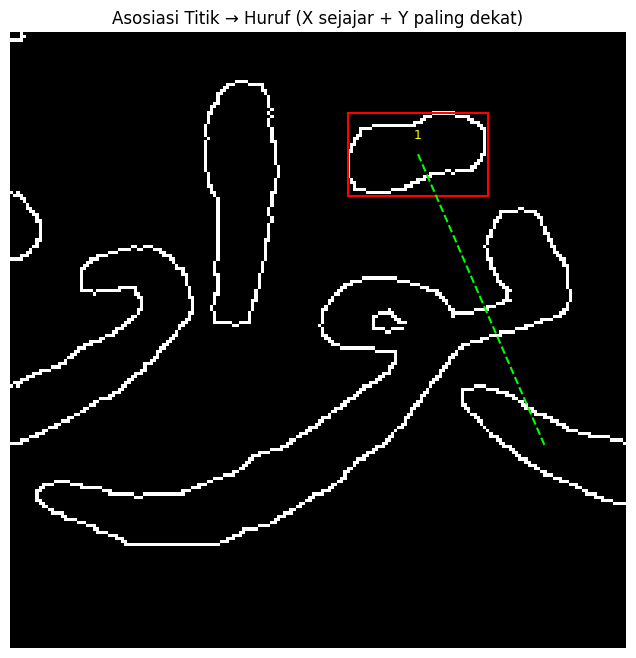

In [ ]:
from skimage.measure import label, regionprops
import numpy as np
import matplotlib.pyplot as plt
import cv2

# === [1] Buat mask huruf utama (rasm) dari citra binary ===
labels, stats = cv2.connectedComponentsWithStats(binary, connectivity=8)[1:3]
rasm_mask = np.zeros_like(binary)

for i in range(1, len(stats)):  # Lewati background
    area = stats[i, cv2.CC_STAT_AREA]
    if area >= 100:  # Ambang area huruf utama
        rasm_mask[labels == i] = 255

# === [2] Label dan region huruf utama ===
rasm_labels = label(rasm_mask)
rasm_regions = regionprops(rasm_labels)

# === [3] Asosiasi titik → huruf dengan logika X sejajar dan Y terdekat dari bawah ===
asosiasi = []

for idx_titik, bbox_titik in enumerate(filtered_dots):
    minr_t, minc_t, maxr_t, maxc_t = bbox_titik
    center_x_titik = (minc_t + maxc_t) // 2
    center_y_titik = (minr_t + maxr_t) // 2

    kandidat_id = None
    jarak_min = float('inf')

    for idx_huruf, region in enumerate(rasm_regions):
        minr_h, minc_h, maxr_h, maxc_h = region.bbox

        # Syarat: titik sejajar secara horizontal dan berada di atas huruf
        if (minc_h - 5 <= center_x_titik <= maxc_h + 5) and (center_y_titik < minr_h):
            delta_y = minr_h - center_y_titik
            if delta_y < jarak_min:
                jarak_min = delta_y
                kandidat_id = idx_huruf

    asosiasi.append((idx_titik, kandidat_id))

# === [4] Cetak hasil asosiasi ke terminal
print("=== HASIL ASOSIASI TITIK DIAKRITIK (X sejajar + Y terdekat) ===")
for titik_id, huruf_id in asosiasi:
    if huruf_id is not None:
        print(f"Titik {titik_id + 1} → Huruf Rasm {huruf_id + 1}")
    else:
        print(f"Titik {titik_id + 1} → Tidak ditemukan huruf pemilik")

# === [5] Visualisasi hasil asosiasi
plt.figure(figsize=(8, 8))
plt.imshow(binary, cmap='gray')
plt.title("Asosiasi Titik → Huruf (X sejajar + Y paling dekat)")
plt.axis("off")

for idx_titik, bbox_titik in enumerate(filtered_dots):
    minr_t, minc_t, maxr_t, maxc_t = bbox_titik
    center_x_titik = (minc_t + maxc_t) / 2
    center_y_titik = (minr_t + maxr_t) / 2

    huruf_id = asosiasi[idx_titik][1]

    # Gambar kotak merah di titik
    rect = plt.Rectangle((minc_t, minr_t), maxc_t - minc_t, maxr_t - minr_t,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

    if huruf_id is not None:
        region_huruf = rasm_regions[huruf_id]
        minr_h, minc_h, maxr_h, maxc_h = region.bbox
        center_x_huruf = (minc_h + maxc_h) / 2
        center_y_huruf = (minr_h + maxr_h) / 2

        # Gambar garis penghubung
        plt.plot([center_x_titik, center_x_huruf],
                 [center_y_titik, center_y_huruf],
                 color='lime', linestyle='--', linewidth=1.5)

        # Label titik
        plt.text(center_x_titik, center_y_titik - 5, f"{idx_titik + 1}",
                 color='yellow', fontsize=9, ha='center')


Saving contoh.jpeg to contoh (1).jpeg


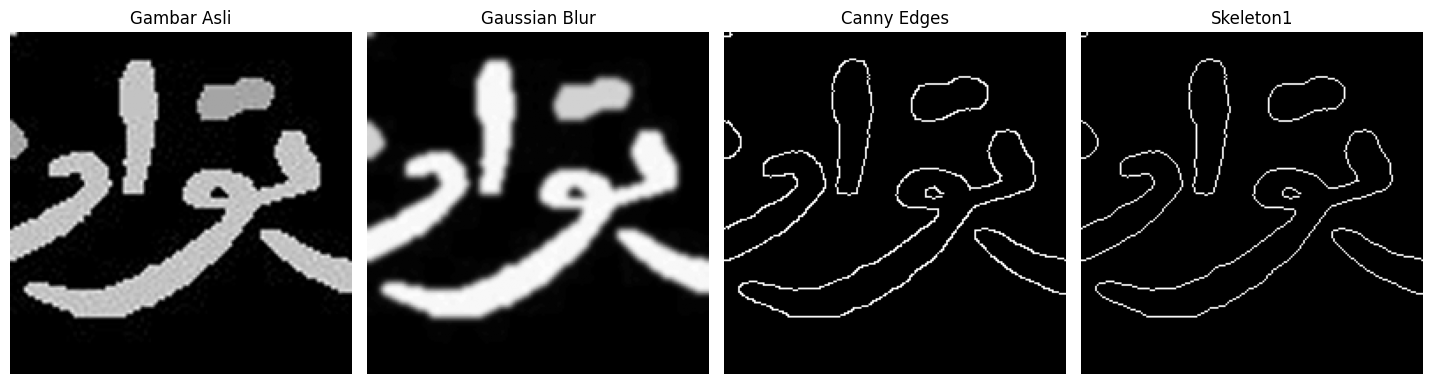

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os # Baris ini ditambahkan
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "contoh.jpeg"  # Sesuaikan dengan path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Periksa apakah gambar berhasil dibaca
if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# === 3. Preprocessing ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# === 4. Canny Edge Detection ===
edges = cv2.Canny(blurred, threshold1=50, threshold2=10)

# === 5. Konversi ke Biner ===
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# === 6. Skeletonization ===
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)


# === 8. Tampilkan Hasil ===
plt.figure(figsize=(18, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton1")
plt.axis("off")

plt.tight_layout()
plt.show()


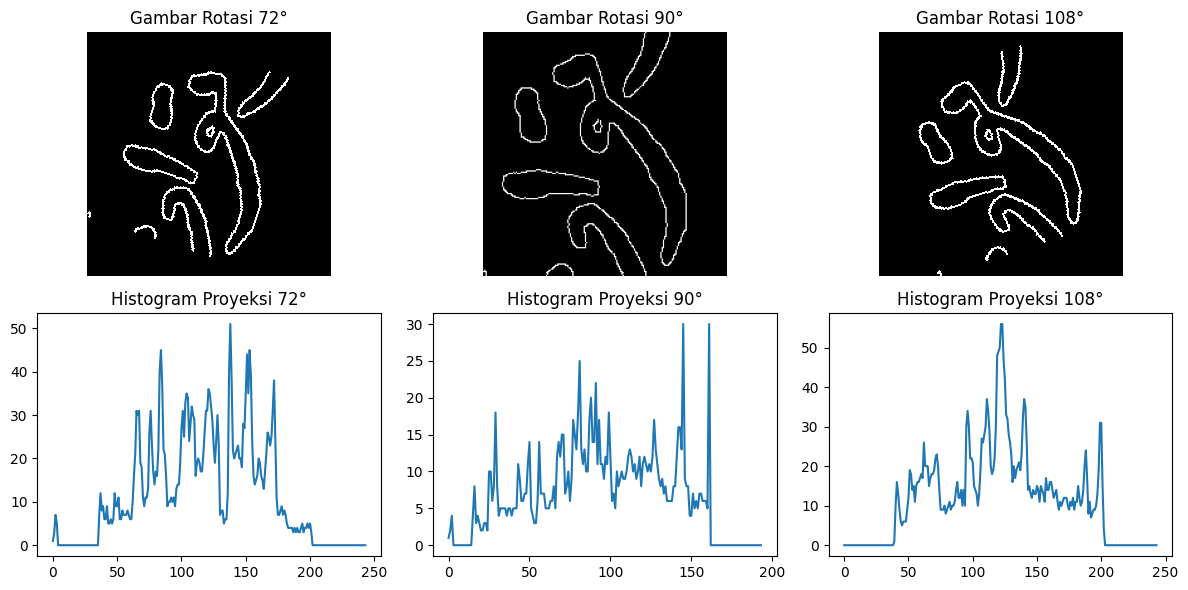

In [ ]:
from skimage.transform import rotate

# Define the function to get rotated projection
def get_rotated_projection(image, angle):
    """
    Rotates an image and calculates its vertical projection histogram.

    Args:
        image (np.ndarray): The input binary image.
        angle (float): The rotation angle in degrees.

    Returns:
        tuple: A tuple containing the vertical projection histogram and the rotated image.
    """
    rotated = rotate(image, angle=angle, resize=True, preserve_range=True)
    rotated_bin = (rotated > 0.5).astype(np.uint8) * 255  # Konversi ke biner
    projection = np.sum(rotated_bin == 255, axis=0)
    return projection, rotated_bin


# === 9. Proyeksi Histogram pada Sudut Berbeda ===
angles = [72, 90, 108]
plt.figure(figsize=(12, 6))

for i, angle in enumerate(angles):
    projection, rot_img = get_rotated_projection(binary, angle)

    plt.subplot(2, 3, i+1)
    plt.imshow(rot_img, cmap='gray')
    plt.title(f"Gambar Rotasi {angle}°")
    plt.axis('off')

    plt.subplot(2, 3, i+4)
    plt.plot(projection)
    plt.title(f"Histogram Proyeksi {angle}°")

plt.tight_layout()
plt.show()

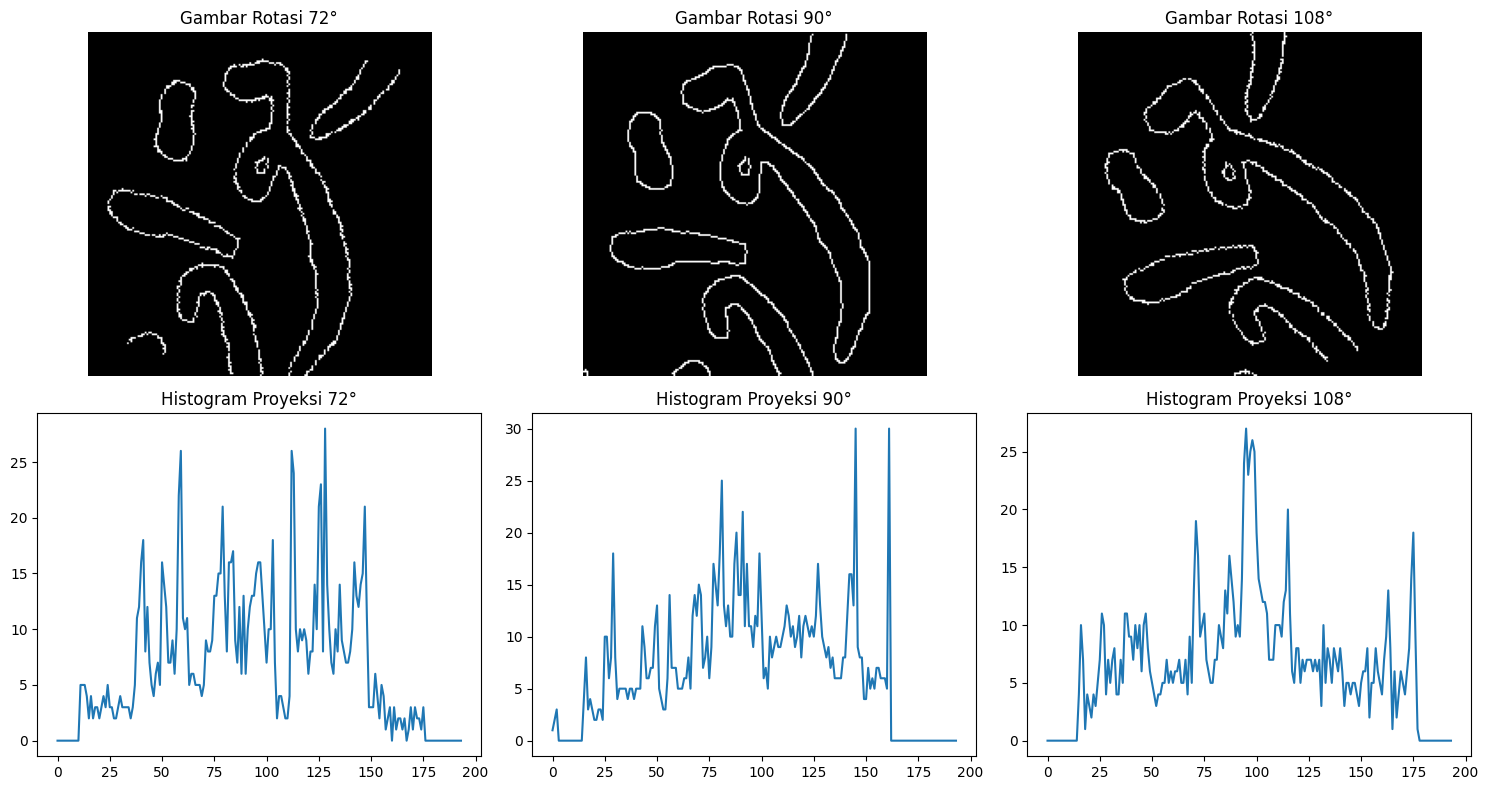

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Fungsi untuk memastikan gambar landscape ===
def make_landscape(image):
    h, w = image.shape
    if w >= h:
        return image  # Sudah landscape
    pad = (h - w) // 2
    padded = cv2.copyMakeBorder(image, 0, 0, pad, pad, cv2.BORDER_CONSTANT, value=0)
    return padded

# === Fungsi untuk rotasi dan proyeksi histogram ===
def get_rotated_projection_opencv(image, angle):
    """
    Rotate image using OpenCV and keep original size (landscape),
    then compute vertical projection histogram.
    """
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotate image using warpAffine
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_NEAREST, borderValue=0)

    # Compute vertical projection
    projection = np.sum(rotated == 255, axis=0)
    return projection, rotated


# === 1. Ubah binary menjadi landscape kalau belum ===
binary = make_landscape(binary)

# === 2. Proyeksi Histogram pada Sudut Berbeda ===
angles = [72, 90, 108]

plt.figure(figsize=(15, 8))

for i, angle in enumerate(angles):
    projection, rot_img = get_rotated_projection_opencv(binary, angle)

    # Gambar hasil rotasi
    plt.subplot(2, 3, i+1)
    plt.imshow(rot_img, cmap='gray')
    plt.title(f"Gambar Rotasi {angle}°")
    plt.axis('off')

    # Histogram proyeksi
    plt.subplot(2, 3, i+4)
    plt.plot(projection)
    plt.title(f"Histogram Proyeksi {angle}°")

plt.tight_layout()
plt.show()


Saving bertumpuk.png to bertumpuk.png


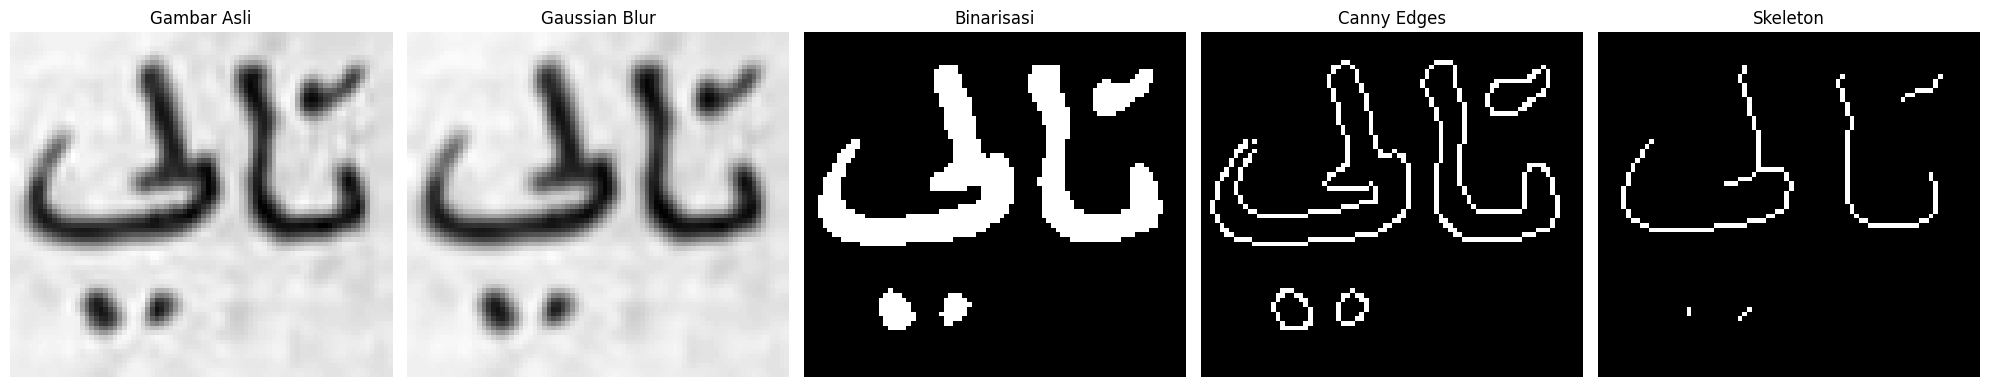

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from google.colab import files

# Upload gambar dari lokal
uploaded = files.upload()

# === 1. Load Gambar Grayscale ===
image_path = "bertumpuk.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# === 3. Gaussian Blur (Denoising) ===
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Binarisasi (objek masih hitam)
_, binary = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY)

# Inversi: objek jadi putih, latar jadi hitam
binary = cv2.bitwise_not(binary)


# === 5. Canny Edge Detection ===
edges = cv2.Canny(binary, threshold1=50, threshold2=150)

# === 6. Skeletonisasi dari hasil binarisasi ===
skeleton = skeletonize(binary == 255)
skeleton = (skeleton * 255).astype(np.uint8)

# === 7. Visualisasi Semua Tahapan ===
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(binary, cmap="gray")
plt.title("Binarisasi")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.tight_layout()
plt.show()


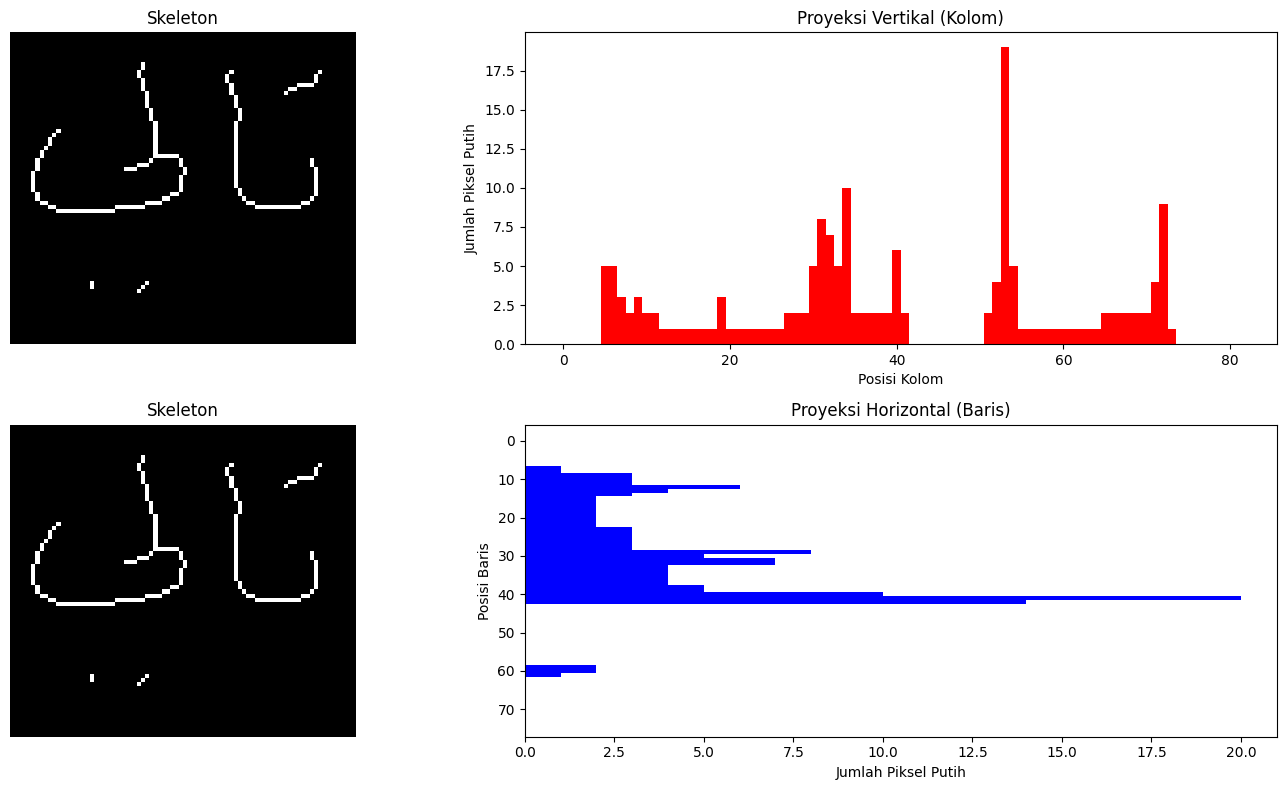

In [79]:
# ===== HISTOGRAM PROYEKSI =====
# Hitung proyeksi vertikal (jumlah piksel putih per kolom)
vertical_projection = np.sum(skeleton == 255, axis=0)

# Hitung proyeksi horizontal (jumlah piksel putih per baris)
horizontal_projection = np.sum(skeleton== 255, axis=1)

# ===== VISUALISASI HISTOGRAM =====
plt.figure(figsize=(15, 8))

# Subplot 1: Skeleton + Proyeksi Vertikal
plt.subplot(2, 2, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.bar(range(len(vertical_projection)), vertical_projection, width=1.0, color='red')
plt.title("Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Subplot 3: Skeleton + Proyeksi Horizontal
plt.subplot(2, 2, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.barh(range(len(horizontal_projection)), horizontal_projection, height=1.0, color='blue')
plt.title("Proyeksi Horizontal (Baris)")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Posisi Baris")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

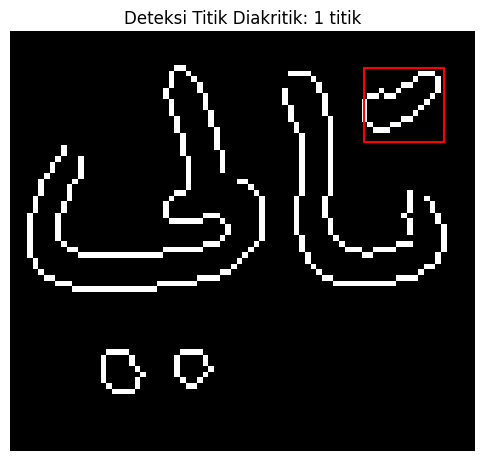

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.measure import label, regionprops

# === 1. Load dan Preprocess Gambar ===
image_path = "bertumpuk.png"  # Ganti dengan nama file kamu
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Gambar tidak ditemukan!")

# Resize agar lebih besar (opsional)
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# Gaussian Blur dan Canny
blurred = cv2.GaussianBlur(image, (9, 9), 0)
edges = cv2.Canny(blurred, 50, 10)
_, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

# Skeletonize
skeleton = skeletonize(binary > 0)
skeleton = (skeleton * 255).astype(np.uint8)

# === 2. Deteksi Baseline dari Histogram Proyeksi Horizontal ===
horizontal_hist = np.sum(binary == 255, axis=1)
baseline_row = np.argmax(horizontal_hist)

# === 3. Label Komponen dan Ambil yang Di Atas Baseline ===
labeled = label(binary > 0)
mask_above_baseline = np.zeros_like(labeled)

for region in regionprops(labeled):
    minr, minc, maxr, maxc = region.bbox
    if maxr < baseline_row:  # Posisi benar-benar di atas baseline
        mask_above_baseline[minr:maxr, minc:maxc] = labeled[minr:maxr, minc:maxc]

# === 4. Filter Titik Berdasarkan Ukuran dan Bentuk ===
filtered_dots = []
for region in regionprops(label(mask_above_baseline)):
    area = region.area
    minr, minc, maxr, maxc = region.bbox
    aspect_ratio = (maxc - minc + 1e-5) / (maxr - minr + 1e-5)

    # Ciri khas titik: area kecil & agak bulat
    if 10 < area < 150 and 0.5 < aspect_ratio < 2.0:
        filtered_dots.append(region.bbox)

# === 5. Visualisasi ===
plt.figure(figsize=(6, 6))
plt.imshow(skeleton, cmap='gray')
for bbox in filtered_dots:
    minr, minc, maxr, maxc = bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         edgecolor='red', facecolor='none', linewidth=1.5)
    plt.gca().add_patch(rect)

plt.title(f"Deteksi Titik Diakritik: {len(filtered_dots)} titik")
plt.axis("off")
plt.show()


Saving sulton.png to sulton (4).png


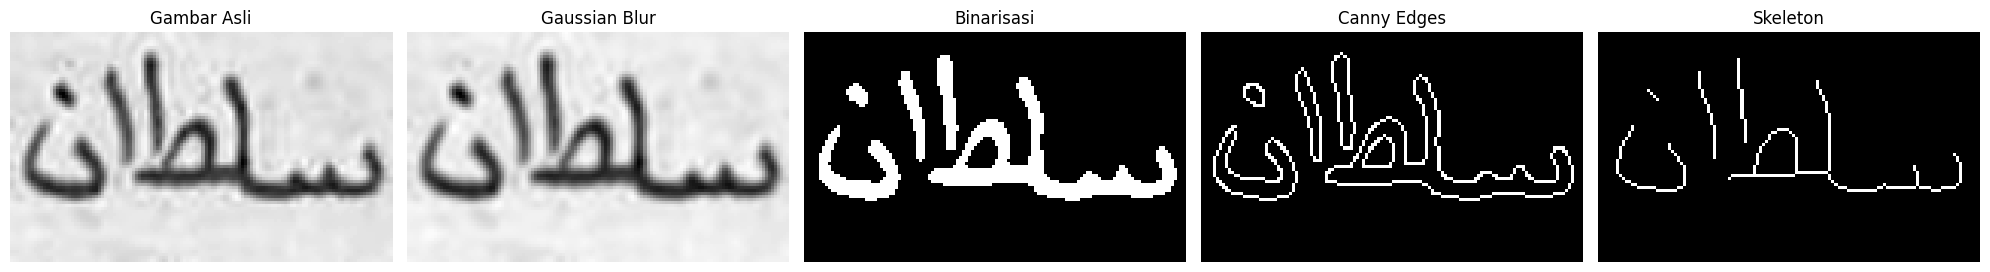

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from google.colab import files

# Upload gambar dari lokal
uploaded = files.upload()

# === 1. Load Gambar Grayscale ===
image_path = "sulton.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# === 3. Gaussian Blur (Denoising) ===
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Binarisasi (objek masih hitam)
_, binary = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY)

# Inversi: objek jadi putih, latar jadi hitam
binary = cv2.bitwise_not(binary)


# === 5. Canny Edge Detection ===
edges = cv2.Canny(binary, threshold1=50, threshold2=150)

# === 6. Skeletonisasi dari hasil binarisasi ===
skeleton = skeletonize(binary == 255)
skeleton = (skeleton * 255).astype(np.uint8)

# === 7. Visualisasi Semua Tahapan ===
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(binary, cmap="gray")
plt.title("Binarisasi")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.tight_layout()
plt.show()


Saving satu.png to satu.png
=== SSIM Score Setiap Kernel ===
Kernel 3x3: SSIM = 0.9920
Kernel 5x5: SSIM = 0.9795
Kernel 7x7: SSIM = 0.9516
Kernel 9x9: SSIM = 0.9228


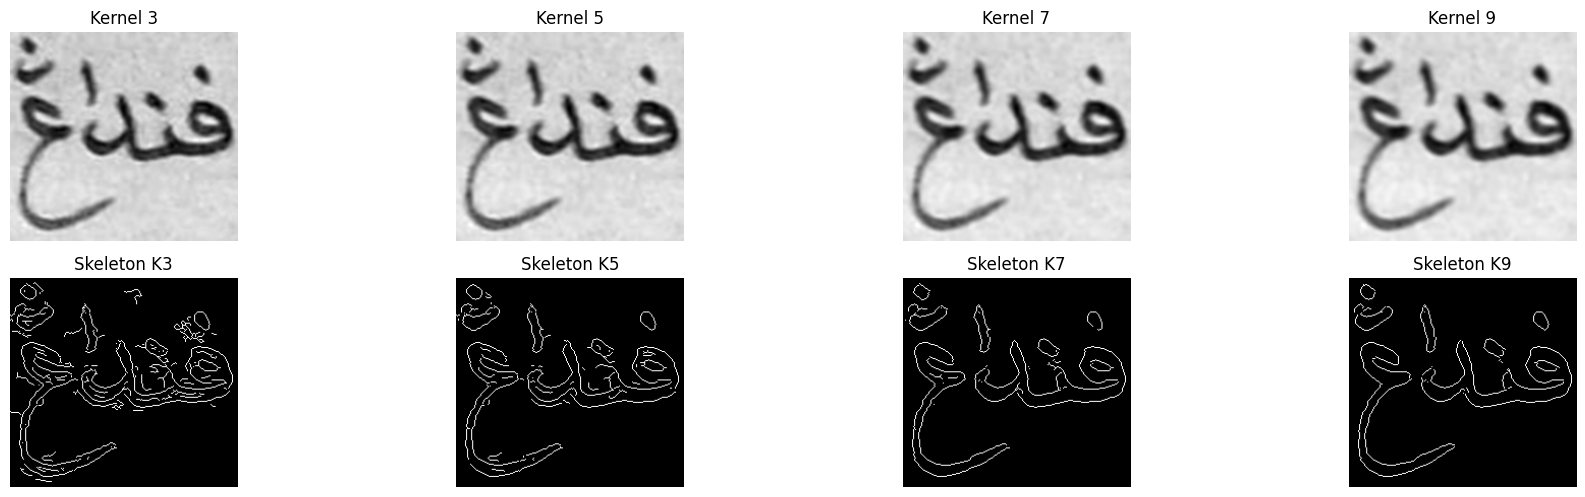

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.morphology import skeletonize
from google.colab import files

# Upload file
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "satu.png"  # Ubah sesuai nama file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# Resize (opsional)
image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# Kernel yang akan diuji
kernel_sizes = [3, 5, 7, 9]

# Untuk menyimpan SSIM dan hasil skeleton
ssim_scores = []
blurred_images = []
skeleton_images = []

plt.figure(figsize=(18, 10))

for idx, k in enumerate(kernel_sizes):
    # === 2. Gaussian Blur ===
    blurred = cv2.GaussianBlur(image, (k, k), 0)
    blurred_images.append(blurred)

    # === 3. Canny Edge ===
    edges = cv2.Canny(blurred, threshold1=50, threshold2=10)

    # === 4. Threshold biner ===
    _, binary = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)

    # === 5. Skeletonization ===
    skeleton = skeletonize(binary > 0)
    skeleton_uint8 = (skeleton * 255).astype(np.uint8)
    skeleton_images.append(skeleton_uint8)

    # === 6. SSIM Evaluasi terhadap gambar asli ===
    score = ssim(image, blurred, data_range=blurred.max() - blurred.min())
    ssim_scores.append(score)

    # === 7. Tampilkan
    plt.subplot(4, len(kernel_sizes), idx + 1)
    plt.imshow(blurred, cmap="gray")
    plt.title(f"Kernel {k}")
    plt.axis("off")

    plt.subplot(4, len(kernel_sizes), idx + 1 + len(kernel_sizes))
    plt.imshow(skeleton_uint8, cmap="gray")
    plt.title(f"Skeleton K{k}")
    plt.axis("off")

# === 8. Cetak Nilai SSIM ===
print("=== SSIM Score Setiap Kernel ===")
for k, score in zip(kernel_sizes, ssim_scores):
    print(f"Kernel {k}x{k}: SSIM = {score:.4f}")

plt.tight_layout()
plt.show()


Saving satu.png to satu (3).png


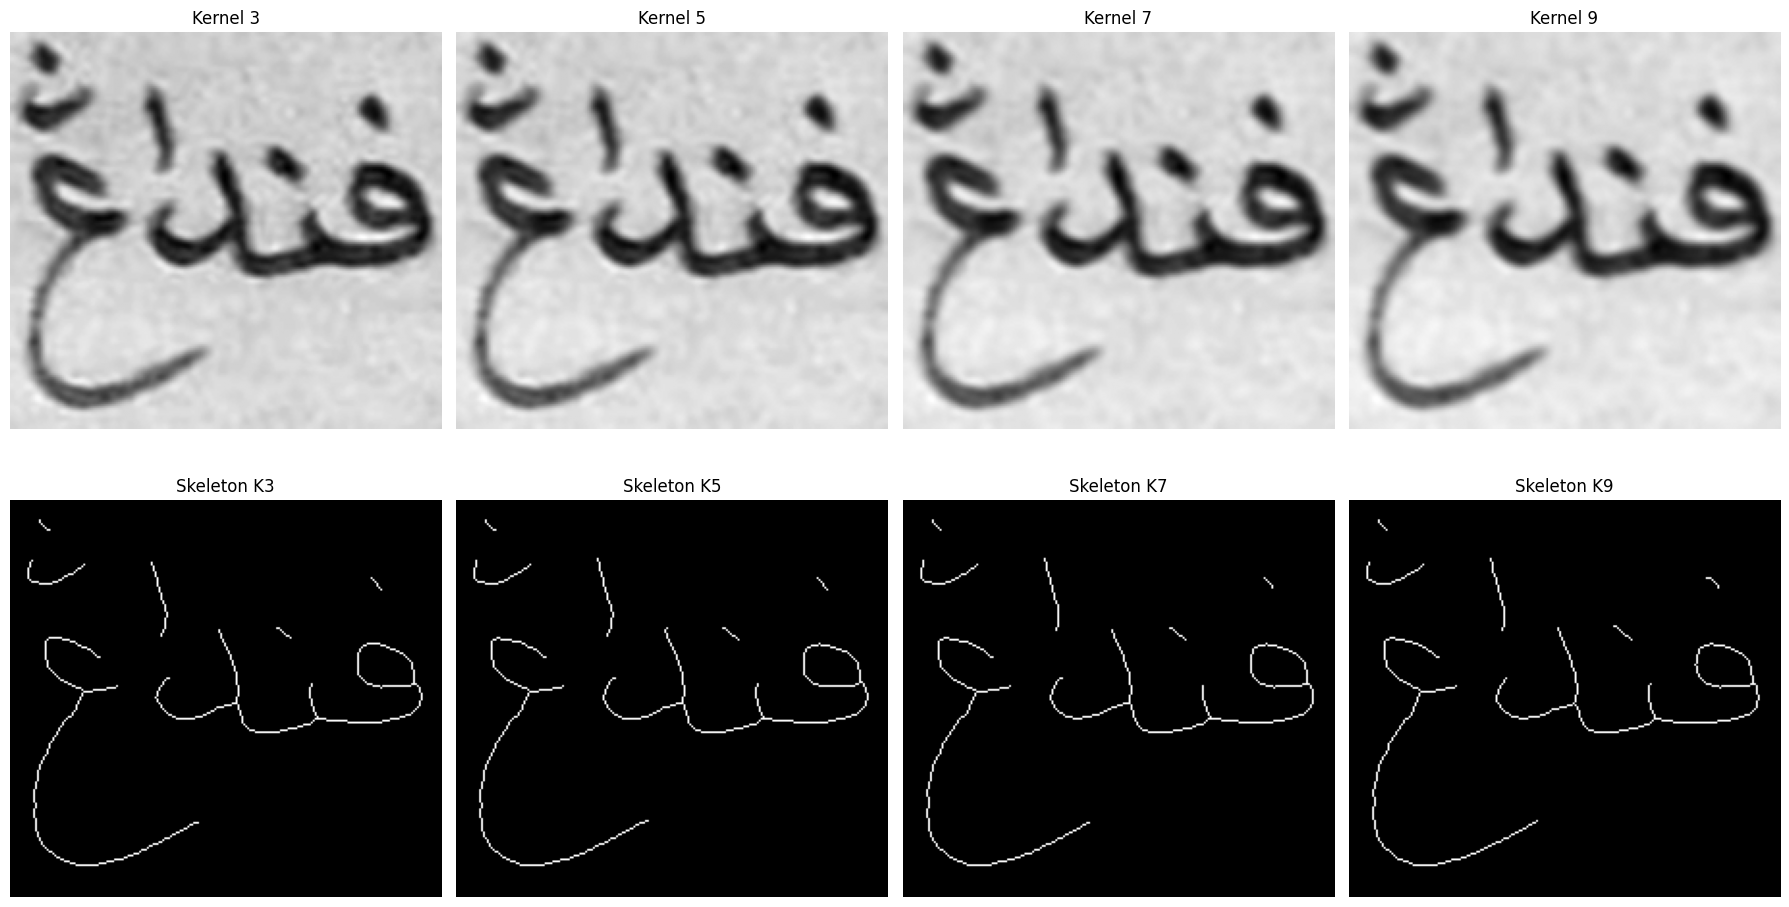

=== SSIM Score (vs Gambar Asli) ===
Kernel 3x3 → SSIM: 0.9920
Kernel 5x5 → SSIM: 0.9795
Kernel 7x7 → SSIM: 0.9516
Kernel 9x9 → SSIM: 0.9228


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.metrics import structural_similarity as ssim
from google.colab import files

# Upload gambar
uploaded = files.upload()

# === 1. Load Gambar ===
image_path = "satu.png"  # Ganti sesuai nama file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path: {image_path}")

# Resize agar lebih besar
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# Ukuran kernel Gaussian Blur yang akan diuji
kernel_sizes = [3, 5, 7, 9]

# Simpan SSIM dan hasil skeleton
ssim_scores = []
plt.figure(figsize=(18, 10))

for idx, k in enumerate(kernel_sizes):
    # === 2. Gaussian Blur ===
    blurred = cv2.GaussianBlur(image, (k, k), 0)

    # === 3. Threshold biner dari blur (tanpa canny)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # === 4. Skeletonize dari huruf (putih di atas hitam → jadi 1-bit dulu)
    skeleton = skeletonize(binary == 0)  # karena huruf hitam = 0
    skeleton_uint8 = (skeleton * 255).astype(np.uint8)

    # === 5. Hitung SSIM untuk evaluasi blur (optional)
    score = ssim(image, blurred, data_range=blurred.max() - blurred.min())
    ssim_scores.append(score)

    # === 6. Tampilkan hasil
    plt.subplot(2, len(kernel_sizes), idx + 1)
    plt.imshow(blurred, cmap="gray")
    plt.title(f"Kernel {k}")
    plt.axis("off")

    plt.subplot(2, len(kernel_sizes), idx + 1 + len(kernel_sizes))
    plt.imshow(skeleton_uint8, cmap="gray")
    plt.title(f"Skeleton K{k}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# === 7. Cetak SSIM
print("=== SSIM Score (vs Gambar Asli) ===")
for k, score in zip(kernel_sizes, ssim_scores):
    print(f"Kernel {k}x{k} → SSIM: {score:.4f}")


Saving satu.png to satu (2).png


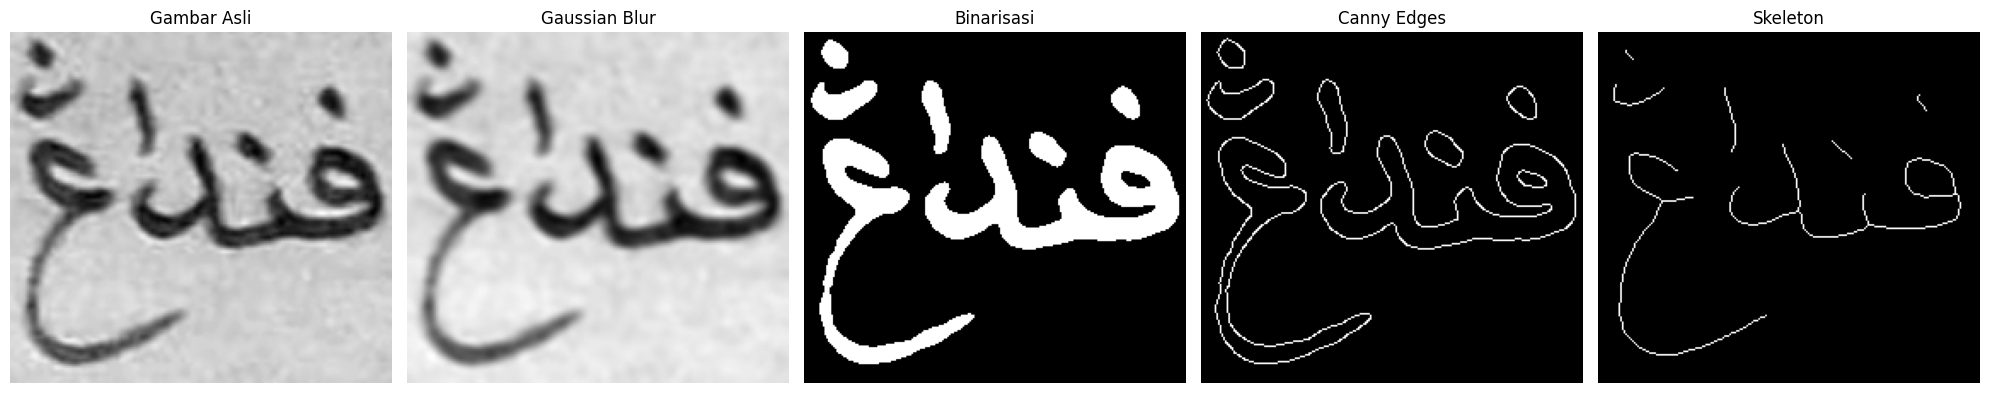

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from google.colab import files

# Upload gambar dari lokal
uploaded = files.upload()

# === 1. Load Gambar Grayscale ===
image_path = "satu.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Gambar tidak ditemukan! Pastikan path benar: {image_path}")

# === 2. Resize Gambar (Opsional) ===
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# === 3. Gaussian Blur (Denoising) ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# Binarisasi (objek masih hitam)
_, binary = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY)

# Inversi: objek jadi putih, latar jadi hitam
binary = cv2.bitwise_not(binary)


# === 5. Canny Edge Detection ===
edges = cv2.Canny(binary, threshold1=50, threshold2=150)

# === 6. Skeletonisasi dari hasil binarisasi ===
skeleton = skeletonize(binary == 255)
skeleton = (skeleton * 255).astype(np.uint8)

# === 7. Visualisasi Semua Tahapan ===
plt.figure(figsize=(20, 5))

plt.subplot(1, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Gaussian Blur")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(binary, cmap="gray")
plt.title("Binarisasi")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(edges, cmap="gray")
plt.title("Canny Edges")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.tight_layout()
plt.show()


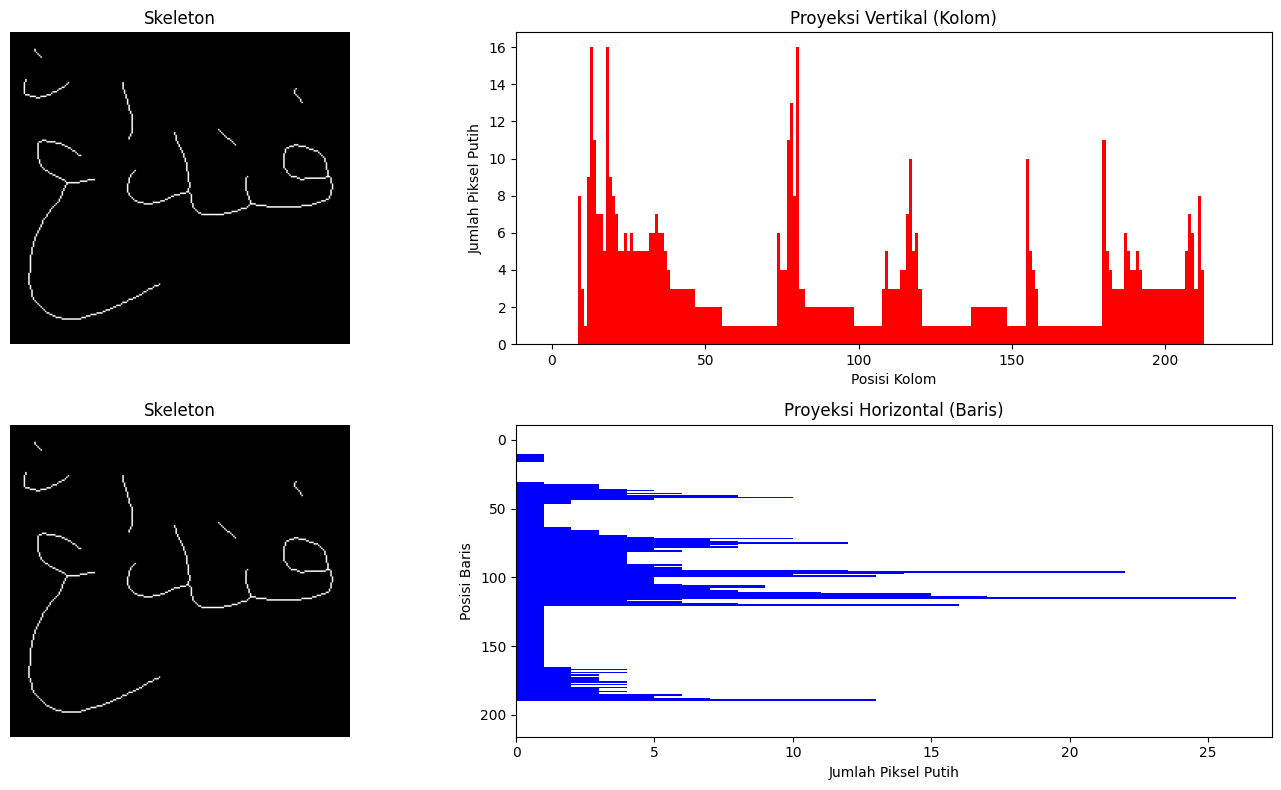

In [ ]:
# ===== HISTOGRAM PROYEKSI =====
# Hitung proyeksi vertikal (jumlah piksel putih per kolom)
vertical_projection = np.sum(skeleton == 255, axis=0)

# Hitung proyeksi horizontal (jumlah piksel putih per baris)
horizontal_projection = np.sum(skeleton== 255, axis=1)

# ===== VISUALISASI HISTOGRAM =====
plt.figure(figsize=(15, 8))

# Subplot 1: Skeleton + Proyeksi Vertikal
plt.subplot(2, 2, 1)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.bar(range(len(vertical_projection)), vertical_projection, width=1.0, color='red')
plt.title("Proyeksi Vertikal (Kolom)")
plt.xlabel("Posisi Kolom")
plt.ylabel("Jumlah Piksel Putih")

# Subplot 3: Skeleton + Proyeksi Horizontal
plt.subplot(2, 2, 3)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeleton")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.barh(range(len(horizontal_projection)), horizontal_projection, height=1.0, color='blue')
plt.title("Proyeksi Horizontal (Baris)")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Posisi Baris")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

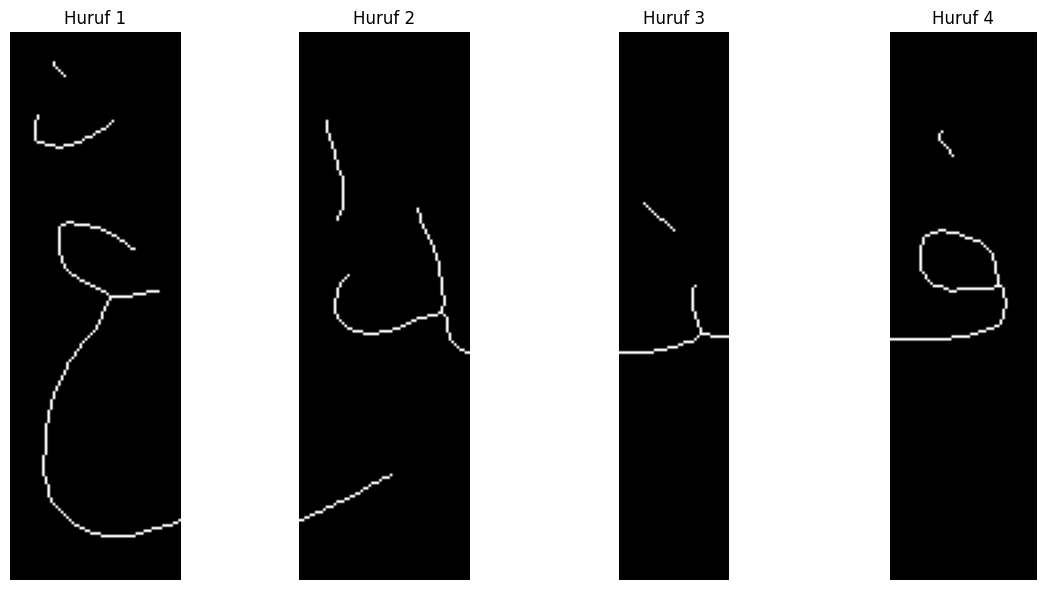

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# == Ambil lembah dari proyeksi vertikal ==
# Cari minimum lokal dengan membalik sinyal proyeksi
valleys, _ = find_peaks(-vertical_projection, prominence=8, distance=40)

# == Gunakan lembah sebagai titik potong ==
batas_potong = valleys

# == Potong gambar berdasarkan titik-titik potong ==
huruf_terpotong = []
start = 0
for batas in batas_potong:
    huruf = skeleton[:, start:batas]
    huruf_terpotong.append(huruf)
    start = batas

# Tambahkan bagian terakhir
huruf_terpotong.append(skeleton[:, start:])

# == Visualisasi hasil pemotongan ==
plt.figure(figsize=(15, 6))
for i, huruf in enumerate(huruf_terpotong[:5]):  # tampilkan hanya 5 huruf pertama
    plt.subplot(1, 5, i+1)
    plt.imshow(huruf, cmap="gray")
    plt.title(f"Huruf {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


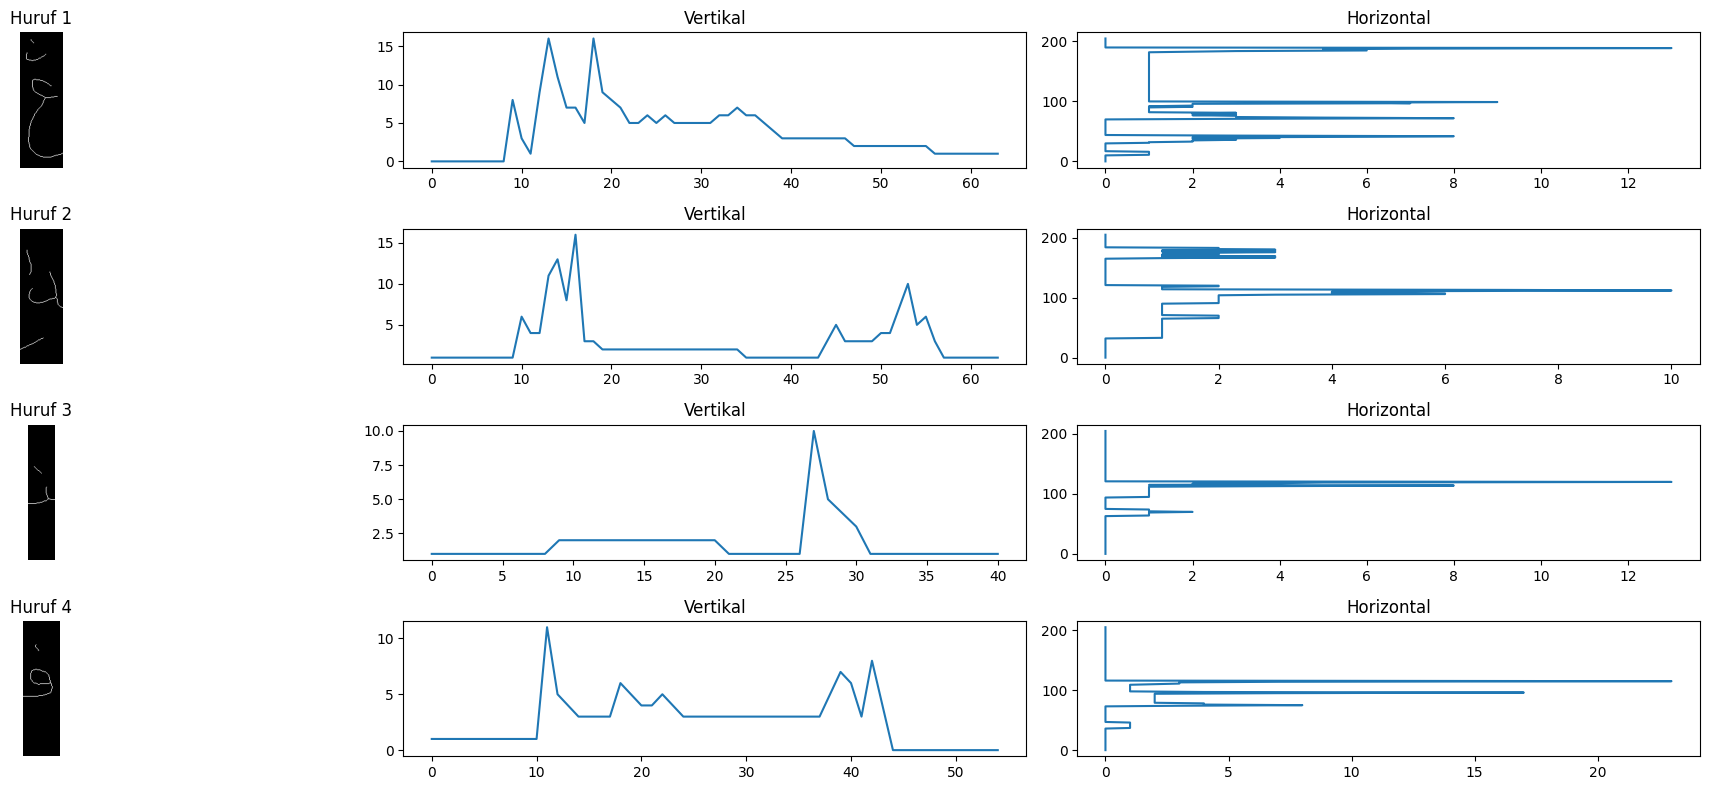

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung proyeksi vertikal dan horizontal
def hitung_histogram_proyeksi(citra):
    proyeksi_vertikal = np.sum(citra == 255, axis=0)
    proyeksi_horizontal = np.sum(citra == 255, axis=1)
    return proyeksi_vertikal, proyeksi_horizontal

# Visualisasi proyeksi tiap huruf hasil potongan
plt.figure(figsize=(20, 8))
jumlah_huruf = len(huruf_terpotong)

for i, huruf in enumerate(huruf_terpotong):
    # Ubah ke uint8 dan pastikan format biner 0/255
    huruf_bin = (huruf > 0).astype(np.uint8) * 255

    # Hitung histogram proyeksi
    v_proj, h_proj = hitung_histogram_proyeksi(huruf_bin)

    # Tampilkan gambar huruf
    plt.subplot(jumlah_huruf, 3, i*3 + 1)
    plt.imshow(huruf_bin, cmap='gray')
    plt.title(f"Huruf {i+1}")
    plt.axis('off')

    # Tampilkan histogram proyeksi vertikal
    plt.subplot(jumlah_huruf, 3, i*3 + 2)
    plt.plot(v_proj)
    plt.title("Vertikal")

    # Tampilkan histogram proyeksi horizontal
    plt.subplot(jumlah_huruf, 3, i*3 + 3)
    plt.plot(h_proj, np.arange(len(h_proj)))
    plt.title("Horizontal")

plt.tight_layout()
plt.show()


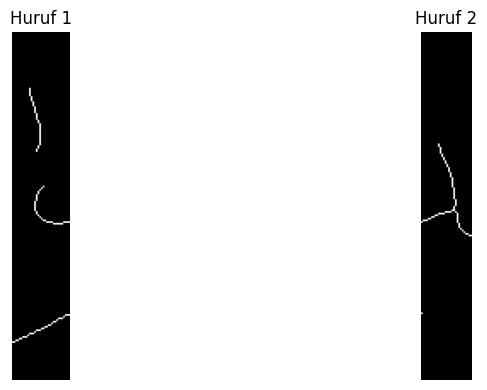

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Ambil huruf ke-2
huruf2 = huruf_terpotong[1]
huruf2_bin = (huruf2 > 0).astype(np.uint8) * 255

# Hitung histogram vertikal
v_proj = np.sum(huruf2_bin == 255, axis=0)

# Cari titik puncak (prominence dan distance bisa disesuaikan)
puncak, _ = find_peaks(v_proj, prominence=9, distance=20)

# Tentukan titik potong di tengah antar puncak
batas_potong = []
for i in range(len(puncak)-1):
    tengah = (puncak[i] + puncak[i+1]) // 2
    batas_potong.append(tengah)

# Potong gambar berdasarkan titik potong
hasil_huruf = []
start = 0
for batas in batas_potong:
    potongan = huruf2_bin[:, start:batas]
    hasil_huruf.append(potongan)
    start = batas
# Tambahkan potongan terakhir
hasil_huruf.append(huruf2_bin[:, start:])

# Tampilkan hasil potongan
plt.figure(figsize=(12, 4))
for i, potong in enumerate(hasil_huruf):
    plt.subplot(1, len(hasil_huruf), i+1)
    plt.imshow(potong, cmap='gray')
    plt.title(f"Huruf {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


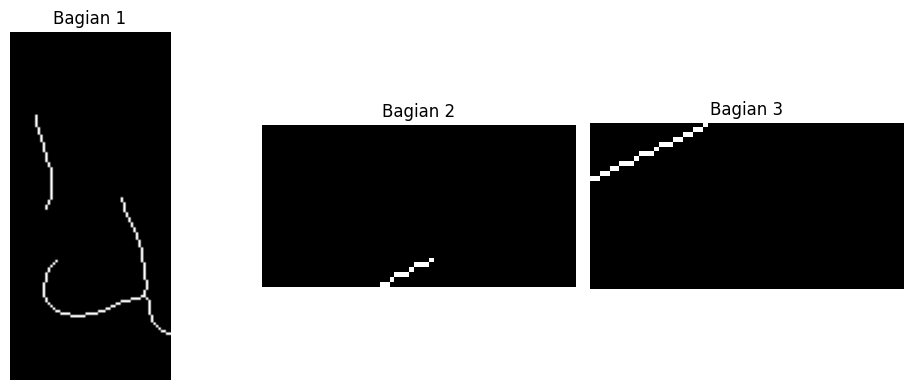

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Ambil huruf ke-2
huruf2 = huruf_terpotong[1]
huruf2_bin = (huruf2 > 0).astype(np.uint8) * 255

# Hitung histogram proyeksi horizontal
h_proj = np.sum(huruf2_bin == 255, axis=1)

# Cari titik puncak (menunjukkan keberadaan bagian huruf di baris tersebut)
puncak, _ = find_peaks(h_proj, prominence=3, distance=10)

# Tentukan titik potong di tengah antara dua puncak
batas_potong = []
for i in range(len(puncak) - 1):
    tengah = (puncak[i] + puncak[i+1]) // 2
    batas_potong.append(tengah)

# Potong gambar berdasarkan batas horizontal (sumbu Y)
huruf_terpisah = []
start = 0
for batas in batas_potong:
    bagian = huruf2_bin[start:batas, :]
    huruf_terpisah.append(bagian)
    start = batas
# Tambahkan bagian terakhir
huruf_terpisah.append(huruf2_bin[start:, :])

# Visualisasi hasil potongan horizontal
plt.figure(figsize=(10, 4))
for i, bagian in enumerate(huruf_terpisah):
    plt.subplot(1, len(huruf_terpisah), i+1)
    plt.imshow(bagian, cmap='gray')
    plt.title(f"Bagian {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


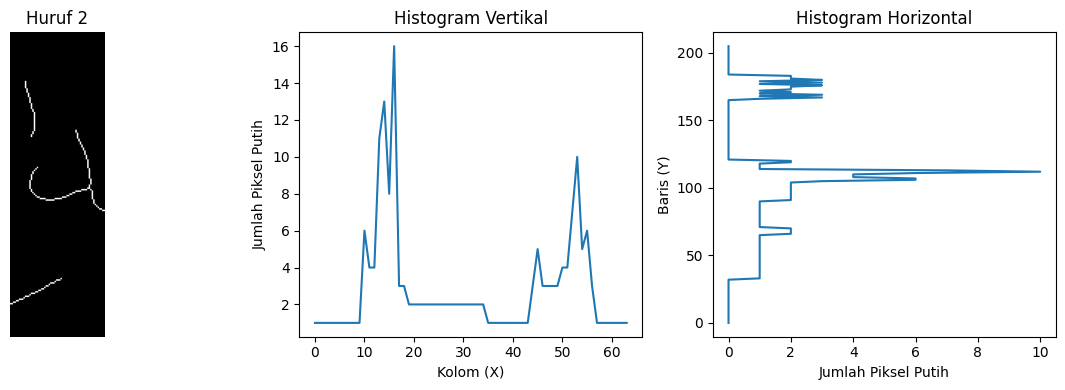

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil huruf ke-2 (index ke-1)
huruf2 = huruf_terpotong[1]

# Konversi ke citra biner 0/255
huruf2_bin = (huruf2 > 0).astype(np.uint8) * 255

# Hitung histogram proyeksi
v_proj = np.sum(huruf2_bin == 255, axis=0)  # vertikal
h_proj = np.sum(huruf2_bin == 255, axis=1)  # horizontal

# Tampilkan citra dan histogram proyeksinya
plt.figure(figsize=(12, 4))

# Gambar huruf
plt.subplot(1, 3, 1)
plt.imshow(huruf2_bin, cmap='gray')
plt.title("Huruf 2")
plt.axis("off")

# Histogram vertikal
plt.subplot(1, 3, 2)
plt.plot(v_proj)
plt.title("Histogram Vertikal")
plt.xlabel("Kolom (X)")
plt.ylabel("Jumlah Piksel Putih")

# Histogram horizontal
plt.subplot(1, 3, 3)
plt.plot(h_proj, np.arange(len(h_proj)))
plt.title("Histogram Horizontal")
plt.xlabel("Jumlah Piksel Putih")
plt.ylabel("Baris (Y)")

plt.tight_layout()
plt.show()


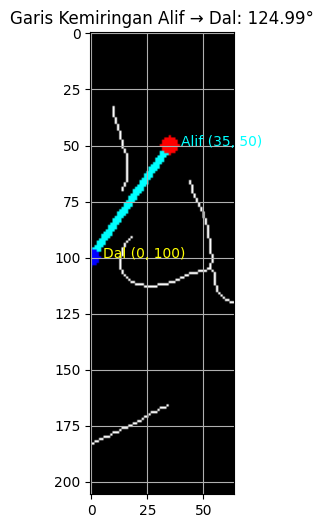

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Ambil huruf ke-2 dari hasil segmentasi
huruf2 = huruf_terpotong[1]
huruf2_bin = (huruf2 > 0).astype(np.uint8) * 255

# Ubah ke RGB untuk anotasi
huruf2_rgb = cv2.cvtColor(huruf2_bin, cv2.COLOR_GRAY2BGR)

# === Titik manual (koordinat x, y) ===
# Ganti sesuai posisi celah antara huruf Alif dan Dal
titik_alif = (35, 50)
titik_dal  = (0, 100)

# Hitung sudut kemiringan
dx = titik_dal[0] - titik_alif[0]
dy = titik_dal[1] - titik_alif[1]
angle_rad = math.atan2(dy, dx)
angle_deg = math.degrees(angle_rad) % 180

# Gambar garis & titik pada gambar
cv2.line(huruf2_rgb, titik_alif, titik_dal, (0, 255, 255), 2)
cv2.circle(huruf2_rgb, titik_alif, 4, (255, 0, 0), -1)
cv2.circle(huruf2_rgb, titik_dal, 4, (0, 0, 255), -1)

# Tampilkan gambar anotasi
plt.figure(figsize=(6, 6))
plt.imshow(huruf2_rgb)
plt.title(f"Garis Kemiringan Alif → Dal: {angle_deg:.2f}°")

# Tambahkan label koordinat
plt.text(titik_alif[0]+5, titik_alif[1], f'Alif {titik_alif}', color='cyan', fontsize=10)
plt.text(titik_dal[0]+5, titik_dal[1], f'Dal {titik_dal}', color='yellow', fontsize=10)

plt.grid(True)
plt.axis('on')
plt.show()


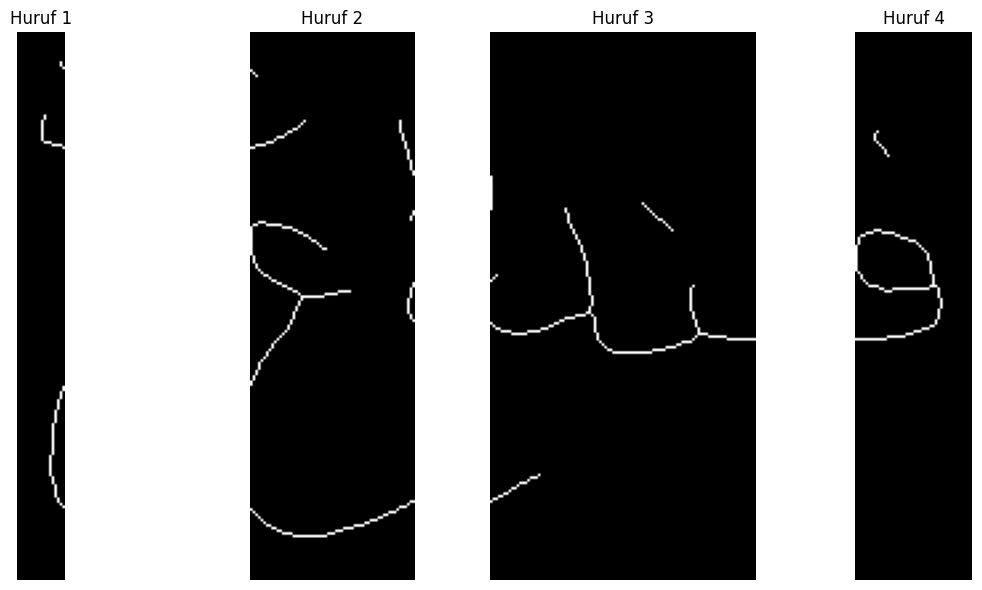

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# == Ambil puncak dari proyeksi vertikal ==
peaks, _ = find_peaks(vertical_projection, prominence=8, distance=40)

# == Gunakan langsung puncak sebagai titik potong ==
batas_potong = peaks

# == Potong gambar berdasarkan titik-titik potong ==
huruf_terpotong = []
start = 0
for batas in batas_potong:
    huruf = skeleton[:, start:batas]
    huruf_terpotong.append(huruf)
    start = batas

# Tambahkan bagian terakhir
huruf_terpotong.append(skeleton[:, start:])

# == Visualisasi hasil pemotongan ==
plt.figure(figsize=(15, 6))
for i, huruf in enumerate(huruf_terpotong[:5]):  # tampilkan hanya 5 huruf pertama
    plt.subplot(1, 5, i+1)
    plt.imshow(huruf, cmap="gray")
    plt.title(f"Huruf {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Saving satu.png to satu (6).png


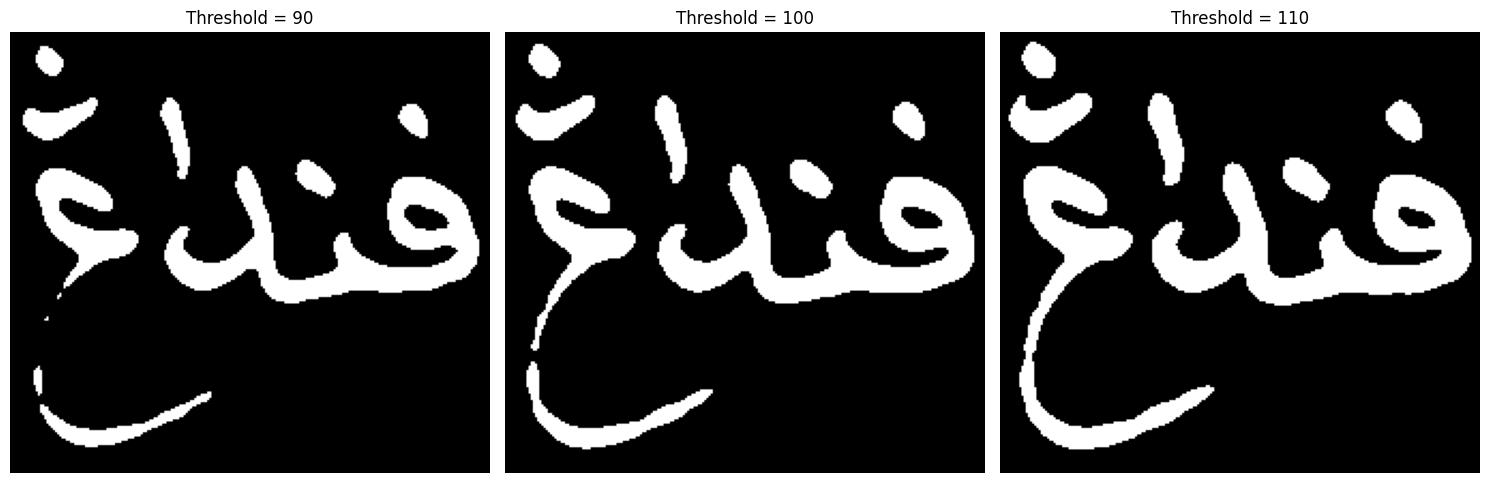

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload gambar
uploaded = files.upload()

# === Load gambar dalam grayscale ===
image_path = "satu.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize jika diperlukan
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# === Denoising dengan Gaussian Blur ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# === Thresholding dengan 3 nilai berbeda ===
threshold_values = [90, 100, 110]
binaries = []

for thresh in threshold_values:
    _, binary = cv2.threshold(blurred, thresh, 255, cv2.THRESH_BINARY)
    binary_inv = cv2.bitwise_not(binary)  # Inversi agar objek huruf = putih
    binaries.append((thresh, binary_inv))

# === Plot hasil ===
plt.figure(figsize=(15, 5))

for i, (thresh, binary) in enumerate(binaries):
    plt.subplot(1, 3, i+1)
    plt.imshow(binary, cmap='gray')
    plt.title(f'Threshold = {thresh}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Saving satu.png to satu (7).png


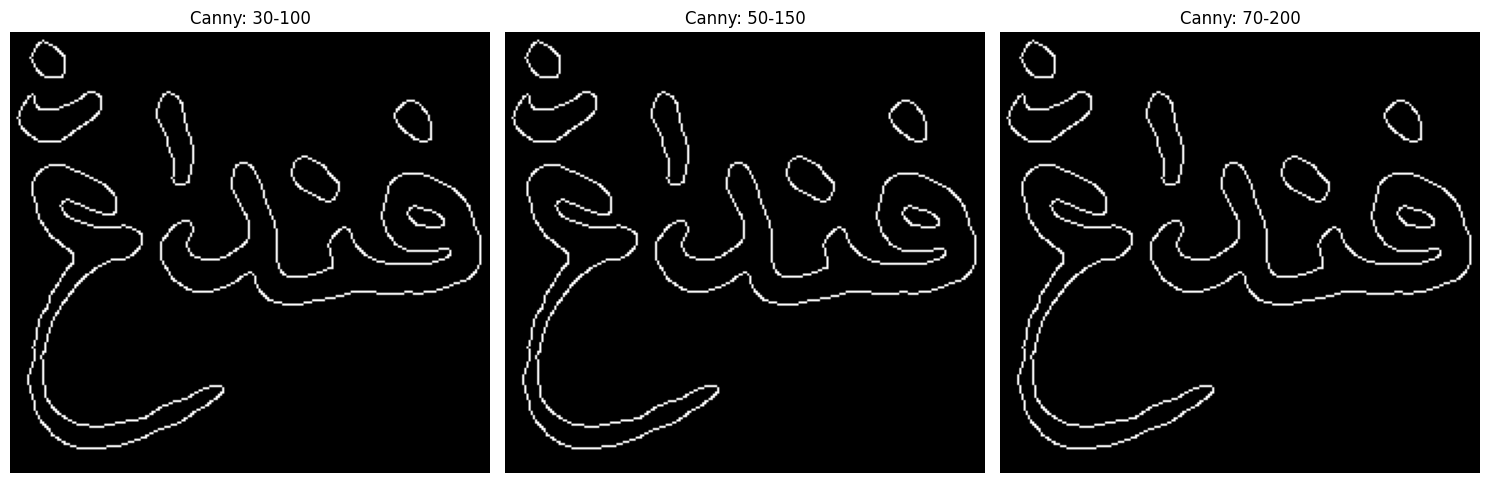

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Upload gambar
uploaded = files.upload()

# === 1. Load dan siapkan gambar ===
image_path = "satu.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# === 2. Denoising ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# === 3. Binarisasi dan inversi ===
_, binary = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)

# === 4. Variasi threshold Canny ===
canny_params = [(30, 100), (50, 150), (70, 200)]
edge_results = []

for low, high in canny_params:
    edges = cv2.Canny(binary, low, high)
    edge_results.append(((low, high), edges))

# === 5. Tampilkan hasil ===
plt.figure(figsize=(15, 5))
for i, ((low, high), edges) in enumerate(edge_results):
    plt.subplot(1, 3, i+1)
    plt.imshow(edges, cmap='gray')
    plt.title(f'Canny: {low}-{high}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Saving satu.png to satu.png


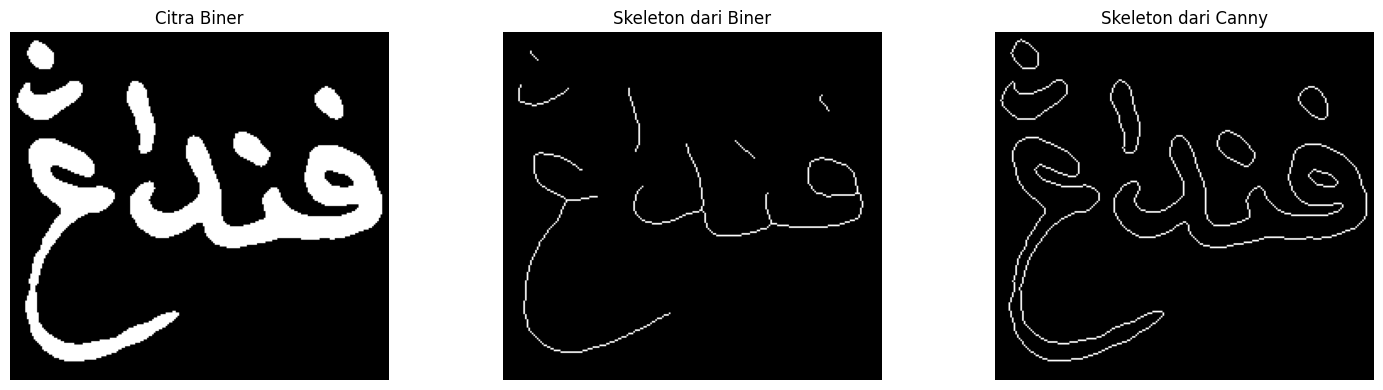

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

from google.colab import files
uploaded = files.upload()  # upload satu.png di sini


# === 1. Load dan siapkan gambar ===
image_path = "satu.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# === 2. Gaussian Blur ===
blurred = cv2.GaussianBlur(image, (9, 9), 0)

# === 3. Binarisasi dan inversi ===
_, binary = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY)
binary_inv = cv2.bitwise_not(binary)

# === 4. Deteksi Tepi Canny ===
edges = cv2.Canny(binary_inv, 50, 150)

# === 5. Skeleton dari hasil Binarisasi (isi huruf) ===
skeleton_binary = skeletonize(binary_inv > 0)
skeleton_binary = (skeleton_binary * 255).astype(np.uint8)

# === 6. Skeleton dari hasil Canny (kontur huruf saja) ===
skeleton_canny = skeletonize(edges > 0)
skeleton_canny = (skeleton_canny * 255).astype(np.uint8)

# === 7. Tampilkan Perbandingan ===
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(binary_inv, cmap='gray')
plt.title("Citra Biner")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(skeleton_binary, cmap='gray')
plt.title("Skeleton dari Biner")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(skeleton_canny, cmap='gray')
plt.title("Skeleton dari Canny")
plt.axis('off')

plt.tight_layout()
plt.show()


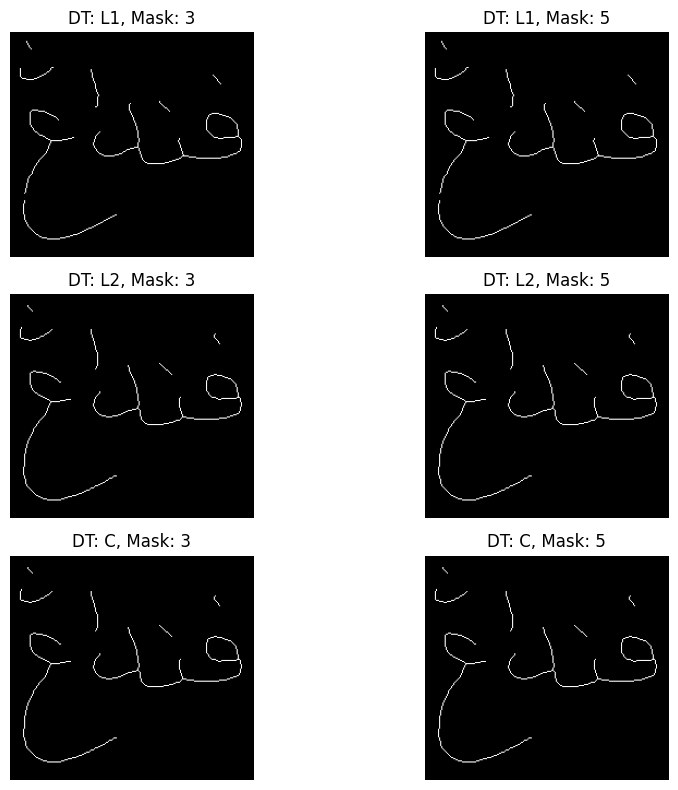

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Load gambar
image = cv2.imread("satu.png", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_CUBIC)

# Denoising dan binarisasi
blurred = cv2.GaussianBlur(image, (9, 9), 0)
_, binary = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY)
binary_inv = cv2.bitwise_not(binary)

# Parameter yang akan diuji
dist_types = [cv2.DIST_L1, cv2.DIST_L2, cv2.DIST_C]
mask_sizes = [3, 5,]

# Visualisasi
fig, axs = plt.subplots(len(dist_types), len(mask_sizes), figsize=(10, 8))

for i, dist_type in enumerate(dist_types):
    for j, mask in enumerate(mask_sizes):
        # Distance transform dan threshold
        dist = cv2.distanceTransform(binary_inv, distanceType=dist_type, maskSize=mask)
        norm = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        _, thres = cv2.threshold(norm, 50, 255, cv2.THRESH_BINARY)

        # Skeletonisasi
        skel = skeletonize(thres > 0).astype(np.uint8) * 255

        # Tampilkan
        axs[i, j].imshow(skel, cmap='gray')
        axs[i, j].axis("off")
        axs[i, j].set_title(f"DT: {['L1','L2','C'][i]}, Mask: {mask}")

plt.tight_layout()
plt.show()
